In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows= 300
pd.options.display.max_columns=300

In [2]:
df=pd.read_csv("telecom_churn_data.csv")

In [3]:
df.shape

(99999, 226)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


- Too many columns. First let's try to rationalise if we need all these columns

In [5]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
df.circle_id.value_counts()

109    99999
Name: circle_id, dtype: int64

- Since the circle_id is the same number we can drop the column completely. It doesn't provide any insights

In [7]:
df1= df.drop(['circle_id'],axis=1)

In [8]:
df1.sample(10)

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
35861,7002161633,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,379.637,414.409,201.963,368.229,4.85,2.06,0.00,13.61,89.66,58.38,70.93,50.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.85,2.06,0.00,13.61,87.51,51.04,59.11,50.51,0.00,0.00,11.81,0.00,0.0,0.00,0.00,0.00,92.36,53.11,70.93,64.13,0.00,0.00,0.00,0.00,2.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,2.15,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,7.33,0.00,0.00,0.00,0.0,0.0,0.0,94.51,60.44,70.93,64.13,10.16,14.41,5.03,4.13,130.69,79.74,23.39,70.58,8.49,2.35,2.06,0.70,149.36,96.51,30.49,75.41,0.00,0.00,0.00,0.00,4.53,0.00,0.00,0.00,0.10,0.00,0.00,0.00,0.0,0.0,0.0,0.0,4.6

- There are too many columns and it is almost impossible to read through each one, to start with. Would be important to first classify and then start some analyses on the data. 
- Recharge amount is a key parameter that will also help us arrive at the average recharge value for the good phase. So let's first look at that. Recharge details are provided in columns with 'rech' or 'rch' mentioned. Therefore, we will filter these out to understand what data is provided in these columns.

In [9]:
col1 = [col for col in df1 if 'rech' in col]
col1

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [10]:
col2 = [col for col in df1 if 'rch' in col]
col2

['last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'last_day_rch_amt_9']

- These columns have information on , both, on calls as well as on mobile data recharge. 
- rch columns are not important for the classification. So we can only focus on RECH columns

In [11]:
df1[col1].sample(10)

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
74286,9,2,4,13,130,40,60,367,30,30,30,50,6/29/2014,7/27/2014,8/31/2014,9/26/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64360,1,3,7,8,0,155,247,338,0,67,61,130,6/21/2014,7/30/2014,8/30/2014,9/27/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45751,8,2,5,2,904,300,733,475,250,300,300,300,6/27/2014,7/14/2014,8/26/2014,9/10/2014,6/16/2014,7/14/2014,NaN,9/10/2014,1.0,1.0,NaN,1.0,154.0,154.0,NaN,175.0,1.0,1.0,NaN,1.0,0.0,0.0,NaN,0.0,154.0,154.0,NaN,175.0
81986,3,5,4,5,260,30,30,160,110,30,30,50,6/12/2014,7/24/2014,8/29/2014,9/11/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80434,6,6,7,8,379,491,674,123,379,398,479,67,6/26/2014,7/26/2014,8/31/2014,9/30/2014,6/26/2014,7/24/2014,8/31/2014,9/27/2014,5.0,3.0,3.0,4.0,23.0,23.0,23.0,23.0,5.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,115.0,69.0,69.0,92.0
76891,4,2,0,0,240,10,0,0,110,10,0,0,6/21/2014,7/9/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95722,1,4,2,2,0,0,130,130,0,0,130,130,6/24/2014,7/30/2014,8/31/2014,9/21/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6890,13,14,10,4,856,1074,872,0,110,128,144,0,6/30/2014,7/28/2014,8/25/2014,9/30/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90581,4,8,8,5,60,140,200,120,30,30,30,30,6/24/2014,7/26/2014,8/27/2014,9/27/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11000,4,5,5,4,60,140,120,90,30,110,30,30,6/19/2014,7/19/2014,8/23/2014,9/26/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filtering customers and Introducing some columns with calculations

- Since the total amount spent by a customer is the sum of the Recharge for calls and Recharge for Data, we will have to add the two. But before that, we have to arrive at the total amount spent by customers on data, which is currently unavailable in the given data. 
- We need to multiply the average data recharge spends with the number of recharges

In [12]:
df1['total_amt_rechdata_6'] = df1['av_rech_amt_data_6'] * df1['total_rech_data_6']
df1['total_amt_rechdata_7'] = df1['av_rech_amt_data_7'] * df1['total_rech_data_7']
df1['total_amt_rechdata_8'] = df1['av_rech_amt_data_8'] * df1['total_rech_data_8']
df1['total_amt_rechdata_9'] = df1['av_rech_amt_data_9'] * df1['total_rech_data_9']

In [13]:
df1.sample(10)

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt_rechdata_6,total_amt_rechdata_7,total_amt_rechdata_8,total_amt_rechdata_9
91039,7000863420,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,390.406,620.865,517.486,278.644,340.58,581.46,528.38,105.84,132.08,139.31,150.64,137.36,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,340.58,581.46,528.38,105.84,124.28,107.24,124.66,125.58,0.00,0.00,0.00,4.19,3.01,0.00,10.60,0.0,464.86,688.71,653.04,235.63,0.00,0.00,0.00,0.00,0.00,32.06,8.08,7.58,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,32.06,8.08,7.58,0.00,0.0,0.0,0.0,7.80,0.86,17.89,0.23,0.00,0.0,0.0,0.0,472.66,721.64,679.03,243.44,793.81,618.74,621.01,174.59,122.19,132.48,102.39,43.03,0.0

- dropping the columns of data used to calculate the total data spends

In [14]:
df1.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], axis=1, inplace=True)

In [15]:
df1.shape

(99999, 221)

- Adding the Call and Data recharge amounts
- Arriving at the average of the monthly spends for month 6 and 7 

In [16]:
good_phase_class = ( df1['total_amt_rechdata_6'].fillna(0) + df1['total_amt_rechdata_7'].fillna(0) + 
                               df1['total_rech_amt_6'].fillna(0) + df1['total_rech_amt_7'].fillna(0) ) / 2


- Calculating the 70th percentile

In [17]:
percentile_70= np.percentile(good_phase_class, 70.0)
percentile_70

478.0

- The cutomer classification of high value customers will be the cutoff of 70th percentile

In [18]:
df2 = df1[good_phase_class >= percentile_70]

In [19]:
df2.shape

(30001, 221)

- Now, as mentioned in the case study specs, we have about 30,000 records. This has helped reduce the data size considerably

## Classification of customers as Churn Vs Non Churn based on 4th month data (which is actually the month of Sept, tagged as 9)
The churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [20]:
df2['churn_class'] = np.where(df2[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)

In [21]:
df2.sample(5)

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt_rechdata_6,total_amt_rechdata_7,total_amt_rechdata_8,total_amt_rechdata_9,churn_class
34223,7001773417,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,146.370,439.470,145.340,189.750,17.09,9.63,2.00,8.69,150.86,57.53,6.39,11.26,0.00,320.46,144.44,167.14,0.00,49.66,8.39,19.96,16.79,6.88,0.00,0.00,58.11,4.43,0.00,0.00,9.13,1.35,0.0,0.0,0.00,0.00,0.00,0.00,84.04,12.66,0.00,0.00,0.30,0.00,0.00,0.00,28.69,4.83,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.99,4.83,0.00,0.00,0.0,0.00,0.0,0.0,54.91,0.00,0.00,0.00,0.00,0.0,0.0,0.00,167.96,17.49,0.00,0.00,117.08,20.09,0.00,0.00,111.54,10.51,0.00,0.00,15.24,8.64,0.00,0.0,243.88,39.26,0.00,0.00,53.48,31.13,0.00,0.00,52.96,27.53,0.00,0.00,64.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,171.11,58.66,0.00,0.00,426.51,99.78,0.00,0.00,0.00,0.00,

In [22]:
df2.churn_class.value_counts(normalize=True)*100

0    91.863605
1     8.136395
Name: churn_class, dtype: float64

- As mentioned in the case study details and also as seen in the above data split, there is a class imbalance when we evaluate the Churn classification. With data having only 8% churn customers

In [23]:
col9=[col for col in df2 if '9' in col]

In [24]:
len(col9)

53

In [25]:
col9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'total_amt_rech

In [26]:
df2.drop([col for col in col9], axis=1, inplace=True)

In [27]:
df2.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt_rechdata_6,total_amt_rechdata_7,total_amt_rechdata_8,churn_class
0,7000842753,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1
7,7000701601,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014

In [28]:
df2.shape

(30001, 169)

## Data Cleaning and EDA

- There are some columns with only single value in the data. We can drop these like we dropped the info on circle.

In [29]:
one_val = []

for col in df2.columns:
    if df2[f'{col}'].nunique() == 1:
        one_val.append(col)

In [30]:
one_val

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [31]:
df2.drop(one_val, axis=1, inplace=True)

In [32]:
df2.shape

(30001, 157)

- We will now check the columns that have missing data

In [33]:
percent_na = round(df2.isna().sum() / len(df2) * 100, 2).sort_values(ascending=False)

In [34]:
percent_na

date_of_last_rech_data_8    46.83
count_rech_2g_8             46.83
total_amt_rechdata_8        46.83
arpu_3g_8                   46.83
fb_user_8                   46.83
arpu_2g_8                   46.83
night_pck_user_8            46.83
count_rech_3g_8             46.83
max_rech_data_8             46.83
total_amt_rechdata_6        44.15
fb_user_6                   44.15
date_of_last_rech_data_6    44.15
max_rech_data_6             44.15
count_rech_2g_6             44.15
arpu_2g_6                   44.15
night_pck_user_6            44.15
count_rech_3g_6             44.15
arpu_3g_6                   44.15
count_rech_2g_7             43.15
total_amt_rechdata_7        43.15
arpu_2g_7                   43.15
fb_user_7                   43.15
arpu_3g_7                   43.15
date_of_last_rech_data_7    43.15
max_rech_data_7             43.15
count_rech_3g_7             43.15
night_pck_user_7            43.15
spl_og_mou_8                 3.91
og_others_8                  3.91
loc_ic_t2t_mou

- Clearly, we can observe that the missing data is very high for some columns (>40%). And then there are columns with have less than 5% missing data. There is no continuity in the extent of missing data by columns. Hence, we can drop the columns with >40% data directly.

In [35]:
high_missing = percent_na[percent_na > 40].index.tolist()
high_missing

['date_of_last_rech_data_8',
 'count_rech_2g_8',
 'total_amt_rechdata_8',
 'arpu_3g_8',
 'fb_user_8',
 'arpu_2g_8',
 'night_pck_user_8',
 'count_rech_3g_8',
 'max_rech_data_8',
 'total_amt_rechdata_6',
 'fb_user_6',
 'date_of_last_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'count_rech_3g_6',
 'arpu_3g_6',
 'count_rech_2g_7',
 'total_amt_rechdata_7',
 'arpu_2g_7',
 'fb_user_7',
 'arpu_3g_7',
 'date_of_last_rech_data_7',
 'max_rech_data_7',
 'count_rech_3g_7',
 'night_pck_user_7']

In [36]:
df2.drop(high_missing, axis=1, inplace=True)

In [37]:
df2.shape

(30001, 130)

- For the rest of the missing values, we can delete the rows with the missing data as there is data imbalance and we will lose more from the non churn data set

In [38]:
for col in df2.columns:
    df2 = df2[~df2[col].isna()]
    
round(df2.isna().sum() / len(df2) * 100, 2).sort_values(ascending=False)

mobile_number          0.0
max_rech_amt_6         0.0
total_rech_amt_7       0.0
total_rech_amt_6       0.0
total_rech_num_8       0.0
total_rech_num_7       0.0
total_rech_num_6       0.0
ic_others_8            0.0
ic_others_7            0.0
ic_others_6            0.0
isd_ic_mou_8           0.0
isd_ic_mou_7           0.0
isd_ic_mou_6           0.0
spl_ic_mou_8           0.0
spl_ic_mou_7           0.0
spl_ic_mou_6           0.0
total_ic_mou_8         0.0
total_ic_mou_7         0.0
total_ic_mou_6         0.0
std_ic_mou_8           0.0
std_ic_mou_7           0.0
std_ic_mou_6           0.0
std_ic_t2f_mou_8       0.0
std_ic_t2f_mou_7       0.0
std_ic_t2f_mou_6       0.0
std_ic_t2m_mou_8       0.0
std_ic_t2m_mou_7       0.0
std_ic_t2m_mou_6       0.0
std_ic_t2t_mou_8       0.0
std_ic_t2t_mou_7       0.0
std_ic_t2t_mou_6       0.0
total_rech_amt_8       0.0
max_rech_amt_7         0.0
arpu_6                 0.0
max_rech_amt_8         0.0
sep_vbc_3g             0.0
jun_vbc_3g             0.0
j

In [39]:
df2.shape

(28163, 130)

- We can also delete the date of last recharge columns as they don't seem to be of much use.

In [40]:
date=[col for col in df2 if 'date' in col]

In [41]:
date

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [42]:
df2.drop(date, axis=1, inplace= True)

In [43]:
df2.shape

(28163, 127)

In [44]:
df2.churn_class.value_counts(normalize=True)

0    0.945389
1    0.054611
Name: churn_class, dtype: float64

- Still we have considerable number of columns
- dropping the column with mobile number, as it will not add any value to analysis

In [45]:
df2.drop('mobile_number', axis=1, inplace=True)

In [46]:
df2.shape

(28163, 126)

- Since the number of columns is still considerably high and there is not much that we can let go off with basic reads. We will do the following - 
1. We can delete the columns that higly correlated with other parameters
2. As a step after this, we can derive new measures by using multiple old columns and then delete the original columns and keep only the derived ones.

In [47]:
corr = df2.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7              arpu_6              0.728704
arpu_8              arpu_6              0.671437
                    arpu_7              0.778413
onnet_mou_7         onnet_mou_6         0.770224
onnet_mou_8         onnet_mou_6         0.646114
                    onnet_mou_7         0.811314
offnet_mou_7        offnet_mou_6        0.755880
offnet_mou_8        offnet_mou_6        0.605742
                    offnet_mou_7        0.772001
roam_ic_mou_8       roam_ic_mou_7       0.618233
roam_og_mou_6       roam_ic_mou_6       0.647696
roam_og_mou_8       roam_og_mou_7       0.605246
loc_og_t2t_mou_7    loc_og_t2t_mou_6    0.801091
loc_og_t2t_mou_8    loc_og_t2t_mou_6    0.708473
                    loc_og_t2t_mou_7    0.836495
loc_og_t2m_mou_7    loc_og_t2m_mou_6    0.790918
loc_og_t2m_mou_8    loc_og_t2m_mou_6    0.698190
                    loc_og_t2m_mou_7    0.826281
loc_og_t2f_mou_7    loc_og_t2f_mou_6    0.812776
loc_og_t2f_mou_8    loc_og_t2f_mou_6    0.674290
                    

- In the columns we have 'loc_og_t2t_mou_6' as duplicate. Hence dropping it twice from the data in the list below.

In [48]:
colcorr=['loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2f_mou_7',
        'loc_og_t2f_mou_6','std_og_t2t_mou_6', 'std_og_t2t_mou_7','std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
        'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
        'loc_ic_t2t_mou_7','loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_7','loc_ic_t2m_mou_6','loc_ic_t2t_mou_6',
        'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 
         'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
        'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
        'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8', 'loc_og_t2t_mou_6']

In [49]:
df2.drop(colcorr,axis=1,inplace=True)

In [50]:
df2.shape

(28163, 87)

- We now have 88 columns and we can reduce it further by deriving new features from existing ones and then dropping the original ones

In [51]:
df2.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn_class
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,0.0,0.0,0.00,422.16,533.91,255.79,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,427.88,355.23,188.04,36.89,11.83,30.39,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,81.43,23.83,15.79,0.00,0.58,0.10,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.00,356.00,0.03,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.04,94.09,129.74,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,125.33,87.68,159.11,14.06,5.98,0.18,0.00,0.00,0.00,81.76,44.21,101.93,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,50,50,50,30,20,50,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,116.63,174.41,224.21,0.51,0.00,13.38,0.00,0.00,0.00,2.94,14.89,57.29,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,179,179,0,179,0,0.00,0.48,0.01,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,0.0,0
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.56,0.0,0.0,0.0,3.48,0.88,40.54,0.00,2.91,0.05,0.23,0.96,0.13,3.18,5.66,1.04,0.00,0.0,0.0,0.00,0.00,0.00,1.23,0.65,0.20,7,14,1,252,1255,455,252,0,455,87.05,57.76,7.97,0,0,0,0,0,0,4,5,1,1,3,0,1328,358.10,2706.83,1714.67,0.0,0


In [52]:
df2['tot_mou_6'] = df2['onnet_mou_6'] + df2['offnet_mou_6']
df2['tot_mou_7'] = df2['onnet_mou_7'] + df2['offnet_mou_7']
df2['tot_mou_8'] = df2['onnet_mou_8'] + df2['offnet_mou_8']

In [53]:
df2.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

In [54]:
df2.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn_class,tot_mou_6,tot_mou_7,tot_mou_8
7,1069.180,1349.850,3171.480,16.23,33.49,31.64,23.74,12.59,38.06,0.0,0.0,0.00,422.16,533.91,255.79,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,427.88,355.23,188.04,36.89,11.83,30.39,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1,511.27,621.84,378.20
8,378.721,492.223,137.362,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,81.43,23.83,15.79,0.00,0.58,0.10,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.00,356.00,0.03,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0,508.35,431.66,171.56
21,514.453,597.753,637.760,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.04,94.09,129.74,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,125.33,87.68,159.11,14.06,5.98,0.18,0.00,0.00,0.00,81.76,44.21,101.93,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,50,50,50,30,20,50,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,0,860.34,1028.79,1068.53
23,74.350,193.897,366.966,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,116.63,174.41,224.21,0.51,0.00,13.38,0.00,0.00,0.00,2.94,14.89,57.29,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,179,179,0,179,0,0.00,0.48,0.01,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,0.0,0,134.37,140.02,239.47
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.56,0.0,0.0,0.0,3.48,0.88,40.54,0.00,2.91,0.05,0.23,0.96,0.13,3.18,5.66,1.04,0.00,0.0,0.0,0.00,0.00,0.00,1.23,0.65,0.20,7,14,1,252,1255,455,252,0,455,87.05,57.76,7.97,0,0,0,0,0,0,4,5,1,1,3,0,1328,358.10,2706.83,1714.67,0.0,0,0.00,0.00,0.00


In [55]:
df2.shape

(28163, 84)

-Converting the Age of network from days to months. That will help reduce size of file.

In [56]:
df2['aon_mon'] = round(df2['aon']/30, 2)
df2.drop('aon', axis=1, inplace=True)
df2.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn_class,tot_mou_6,tot_mou_7,tot_mou_8,aon_mon
7,1069.180,1349.850,3171.480,16.23,33.49,31.64,23.74,12.59,38.06,0.0,0.0,0.00,422.16,533.91,255.79,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,427.88,355.23,188.04,36.89,11.83,30.39,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,0.0,1,511.27,621.84,378.20,26.73
8,378.721,492.223,137.362,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,81.43,23.83,15.79,0.00,0.58,0.10,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.00,356.00,0.03,0,1,0,0,1,3,0,0,0,0,0,0,21.03,910.65,122.16,0.0,0,508.35,431.66,171.56,10.50
21,514.453,597.753,637.760,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.04,94.09,129.74,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,125.33,87.68,159.11,14.06,5.98,0.18,0.00,0.00,0.00,81.76,44.21,101.93,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,50,50,50,30,20,50,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.0,0,860.34,1028.79,1068.53,24.00
23,74.350,193.897,366.966,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,116.63,174.41,224.21,0.51,0.00,13.38,0.00,0.00,0.00,2.94,14.89,57.29,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,179,179,0,179,0,0.00,0.48,0.01,0,0,0,0,0,0,0,2,1,0,0,1,40.45,51.86,0.00,0.0,0,134.37,140.02,239.47,20.13
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.56,0.0,0.0,0.0,3.48,0.88,40.54,0.00,2.91,0.05,0.23,0.96,0.13,3.18,5.66,1.04,0.00,0.0,0.0,0.00,0.00,0.00,1.23,0.65,0.20,7,14,1,252,1255,455,252,0,455,87.05,57.76,7.97,0,0,0,0,0,0,4,5,1,1,3,0,358.10,2706.83,1714.67,0.0,0,0.00,0.00,0.00,44.27


-Renaming the vbc column from month name to the number as it will be consistent with overall data

In [57]:
df2['vbc_3g_8'] = df2['aug_vbc_3g']
df2.drop('aug_vbc_3g', axis=1, inplace=True)

-Getting the average of june and july to arrive at the goodphase number

In [58]:
df2['goodp_vbc_3g'] = ( df2['jul_vbc_3g'] + df2['jun_vbc_3g'] ) / 2

-Dropping the irrelevant columns - 
a. the July and June data which has already been used to arrive at average
b. the Sept data that is to be dropped as we will not be using any month 9 data

In [59]:
df2.drop(['jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], axis=1, inplace=True)

In [60]:
df2.shape

(28163, 82)

- We have to also fine tune the columns pertaining to the month 6 and 7 where we have to keep the averages. Drop the ones with separate month 6 and month 7 data

In [61]:
col_67 = [col[:-2] for col in df2.columns if '6' in col or '7' in col]

In [62]:
col_67

['arpu',
 'arpu',
 'roam_ic_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'roam_og_mou',
 'loc_og_t2c_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'loc_og_mou',
 'std_og_t2f_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'std_og_mou',
 'isd_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'spl_og_mou',
 'og_others',
 'og_others',
 'loc_ic_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2t_mou',
 'std_ic_t2f_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'std_ic_mou',
 'spl_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'ic_others',
 'total_rech_num',
 'total_rech_num',
 'max_rech_amt',
 'max_rech_amt',
 'last_day_rch_amt',
 'last_day_rch_amt',
 'vol_2g_mb',
 'vol_2g_mb',
 'monthly_2g',
 'monthly_2g',
 'sachet_2g',
 'sachet_2g',
 'monthly_3g',
 'monthly_3g',
 'sachet_3g',
 'sachet_3g',
 'tot_mou',
 'tot_mou']

In [63]:
for col in set(col_67):
    df2[f'goodp_{col}'] = ( df2[f'{col}_6'] + df2[f'{col}_7'] ) / 2
    df2.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)

In [64]:
df2.shape

(28163, 56)

In [65]:
df2.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,churn_class,tot_mou_8,aon_mon,vbc_3g_8,goodp_vbc_3g,goodp_ic_others,goodp_monthly_3g,goodp_tot_mou,goodp_monthly_2g,goodp_arpu,goodp_std_og_mou,goodp_total_rech_num,goodp_sachet_3g,goodp_std_ic_t2t_mou,goodp_og_others,goodp_loc_ic_mou,goodp_spl_ic_mou,goodp_std_ic_mou,goodp_max_rech_amt,goodp_isd_ic_mou,goodp_vol_2g_mb,goodp_spl_og_mou,goodp_loc_og_mou,goodp_roam_og_mou,goodp_isd_og_mou,goodp_std_ic_t2f_mou,goodp_loc_og_t2c_mou,goodp_roam_ic_mou,goodp_last_day_rch_amt,goodp_sachet_2g,goodp_std_og_t2f_mou
7,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,1,378.20,26.73,57.74,19.060,15.465,0.0,566.555,0.0,1209.5150,68.000,5.0,0.0,24.360,0.0,391.555,0.105,176.810,1185.0,8.295,0.000,2.25,478.035,18.165,0.090,43.215,0.0,24.86,0.0,0.0,13.37
8,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,0,171.56,10.50,21.03,516.405,0.000,0.0,470.005,0.5,435.4720,136.870,20.0,0.0,0.290,0.0,52.630,0.000,13.545,122.0,0.000,178.000,0.00,333.135,0.000,0.000,0.000,0.0,0.00,25.0,0.5,0.00
21,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,0,1068.53,24.00,0.00,0.000,0.000,0.0,944.565,0.0,556.1030,848.990,24.0,0.0,10.020,0.0,106.505,0.000,62.985,50.0,0.000,0.000,0.00,95.565,0.000,0.000,0.000,0.0,0.00,25.0,0.0,0.00
23,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,0,239.47,20.13,40.45,25.930,2.675,1.0,137.195,0.0,134.1235,4.355,4.0,0.0,0.255,0.0,145.520,0.000,8.915,89.5,14.115,0.240,0.05,132.795,0.000,0.005,0.000,0.0,0.00,89.5,0.0,0.00
33,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,0,0.00,44.27,358.10,2210.750,0.940,4.5,0.000,0.0,1669.9265,0.000,10.5,2.0,1.455,0.0,2.180,0.000,4.420,753.5,0.000,72.405,0.00,0.000,0.000,0.000,0.595,0.0,0.00,126.0,0.0,0.00


- Since we have deleted rows, the index numbers have changed, hence we need to reindex it to start from 0.

In [66]:
df2.reset_index(inplace=True, drop=True)
df2.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,churn_class,tot_mou_8,aon_mon,vbc_3g_8,goodp_vbc_3g,goodp_ic_others,goodp_monthly_3g,goodp_tot_mou,goodp_monthly_2g,goodp_arpu,goodp_std_og_mou,goodp_total_rech_num,goodp_sachet_3g,goodp_std_ic_t2t_mou,goodp_og_others,goodp_loc_ic_mou,goodp_spl_ic_mou,goodp_std_ic_mou,goodp_max_rech_amt,goodp_isd_ic_mou,goodp_vol_2g_mb,goodp_spl_og_mou,goodp_loc_og_mou,goodp_roam_og_mou,goodp_isd_og_mou,goodp_std_ic_t2f_mou,goodp_loc_og_t2c_mou,goodp_roam_ic_mou,goodp_last_day_rch_amt,goodp_sachet_2g,goodp_std_og_t2f_mou
0,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,1,378.20,26.73,57.74,19.060,15.465,0.0,566.555,0.0,1209.5150,68.000,5.0,0.0,24.360,0.0,391.555,0.105,176.810,1185.0,8.295,0.000,2.25,478.035,18.165,0.090,43.215,0.0,24.86,0.0,0.0,13.37
1,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,0,171.56,10.50,21.03,516.405,0.000,0.0,470.005,0.5,435.4720,136.870,20.0,0.0,0.290,0.0,52.630,0.000,13.545,122.0,0.000,178.000,0.00,333.135,0.000,0.000,0.000,0.0,0.00,25.0,0.5,0.00
2,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,0,1068.53,24.00,0.00,0.000,0.000,0.0,944.565,0.0,556.1030,848.990,24.0,0.0,10.020,0.0,106.505,0.000,62.985,50.0,0.000,0.000,0.00,95.565,0.000,0.000,0.000,0.0,0.00,25.0,0.0,0.00
3,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,0,239.47,20.13,40.45,25.930,2.675,1.0,137.195,0.0,134.1235,4.355,4.0,0.0,0.255,0.0,145.520,0.000,8.915,89.5,14.115,0.240,0.05,132.795,0.000,0.005,0.000,0.0,0.00,89.5,0.0,0.00
4,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,0,0.00,44.27,358.10,2210.750,0.940,4.5,0.000,0.0,1669.9265,0.000,10.5,2.0,1.455,0.0,2.180,0.000,4.420,753.5,0.000,72.405,0.00,0.000,0.000,0.000,0.595,0.0,0.00,126.0,0.0,0.00


- Some more data cleaning needs to be done to check outliers

In [67]:
df2.describe().round()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,churn_class,tot_mou_8,aon_mon,vbc_3g_8,goodp_vbc_3g,goodp_ic_others,goodp_monthly_3g,goodp_tot_mou,goodp_monthly_2g,goodp_arpu,goodp_std_og_mou,goodp_total_rech_num,goodp_sachet_3g,goodp_std_ic_t2t_mou,goodp_og_others,goodp_loc_ic_mou,goodp_spl_ic_mou,goodp_std_ic_mou,goodp_max_rech_amt,goodp_isd_ic_mou,goodp_vol_2g_mb,goodp_spl_og_mou,goodp_loc_og_mou,goodp_roam_og_mou,goodp_isd_og_mou,goodp_std_ic_t2f_mou,goodp_loc_og_t2c_mou,goodp_roam_ic_mou,goodp_last_day_rch_amt,goodp_sachet_2g,goodp_std_og_t2f_mou
count,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0
mean,529.0,13.0,21.0,2.0,248.0,2.0,322.0,2.0,7.0,0.0,236.0,15.0,3.0,47.0,0.0,11.0,1.0,10.0,165.0,95.0,110.0,0.0,1.0,0.0,0.0,0.0,597.0,41.0,174.0,169.0,1.0,0.0,656.0,0.0,567.0,363.0,12.0,0.0,16.0,0.0,241.0,0.0,49.0,168.0,11.0,128.0,7.0,263.0,24.0,2.0,3.0,2.0,15.0,99.0,1.0,2.0
std,500.0,76.0,108.0,7.0,367.0,11.0,615.0,46.0,21.0,3.0,313.0,73.0,20.0,142.0,0.0,72.0,13.0,9.0,169.0,142.0,318.0,0.0,3.0,1.0,1.0,0.0,706.0,32.0,425.0,396.0,14.0,1.0,658.0,0.0,432.0,587.0,9.0,1.0,77.0,3.0,303.0,0.0,135.0,148.0,75.0,304.0,18.0,362.0,94.0,46.0,18.0,7.0,66.0,108.0,2.0,12.0
min,-345.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,-452.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,258.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,51.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,67.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,16.0,0.0,0.0,0.0,0.0,179.0,0.0,356.0,2.0,6.0,0.0,0.0,0.0,63.0,0.0,3.0,104.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0
50%,445.0,0.0,0.0,0.0,124.0,0.0,35.0,0.0,1.0,0.0,140.0,0.0,0.0,11.0,0.0,0.0,0.0,8.0,140.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,387.0,29.0,0.0,0.0,0.0,0.0,499.0,0.0,490.0,67.0,10.0,0.0,2.0,0.0,148.0,0.0,15.0,128.0,0.0,7.0,2.0,141.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0,0.0
75%,675.0,0.0,0.0,0.0,325.0,0.0,393.0,0.0,7.0,0.0,299.0,8.0,0.0,41.0,0.0,0.0,0.0,13.0,198.0,130.0,59.0,0.0,1.0,0.0,0.0,0.0,827.0,60.0,142.0,158.0,0.0,0.0,923.0,0.0,682.0,544.0,14.0,0.0,10.0,0.0,308.0,0.0,46.0,198.0,1.0,110.0,7.0,347.0,3.0,0.0,1.0,1.0,2.0,124.0,1.0,0.0
max,33544.0,4170.0,5337.0,352.0,11040.0,517.0,13980.0,5682.0,955.0,395.0,5389.0,4309.0,1395.0,5957.0,6.0,3433.0,1210.0,196.0,4449.0,4449.0,11118.0,5.0,44.0,16.0,41.0,1.0,14043.0,144.0,12916.0,8191.0,1420.0,12.0,9344.0,4.0,31438.0,8856.0,156.0,26.0,5630.0,305.0,6557.0,17.0,5630.0,3299.0,5651.0,7939.0,1144.0,6582.0,2411.0,5695.0,1185.0,421.0,3061.0,3100.0,38.0,383.0


- Most columns seem to have outliers. We have to plot and boxplot for all the columns

In [68]:
column_names = list(df2.columns)

In [69]:
column_names

['arpu_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'churn_class',
 'tot_mou_8',
 'aon_mon',
 'vbc_3g_8',
 'goodp_vbc_3g',
 'goodp_ic_others',
 'goodp_monthly_3g',
 'goodp_tot_mou',
 'goodp_monthly_2g',
 'goodp_arpu',
 'goodp_std_og_mou',
 'goodp_total_rech_num',
 'goodp_sachet_3g',
 'goodp_std_ic_t2t_mou',
 'goodp_og_others',
 'goodp_loc_ic_mou',
 'goodp_spl_ic_mou',
 'goodp_std_ic_mou',
 'goodp_max_rech_amt',
 'goodp_isd_ic_mou',
 'goodp_vol_2g_mb',
 'goodp_spl_og_mou',
 'goodp_loc_og_mou',
 'goodp_roam_og_mou',
 'goodp_isd_og_mou',
 'goodp_std_ic_t2f_mou',
 'goodp_loc_og_t2c_mou',
 'goodp_roam_ic_

- ARPU is negative also in some cases. There is no clear understanding as to why. Were their services continued even when they did not pay?

In [70]:
df2[(df2['arpu_8']<0)].head(10)

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,churn_class,tot_mou_8,aon_mon,vbc_3g_8,goodp_vbc_3g,goodp_ic_others,goodp_monthly_3g,goodp_tot_mou,goodp_monthly_2g,goodp_arpu,goodp_std_og_mou,goodp_total_rech_num,goodp_sachet_3g,goodp_std_ic_t2t_mou,goodp_og_others,goodp_loc_ic_mou,goodp_spl_ic_mou,goodp_std_ic_mou,goodp_max_rech_amt,goodp_isd_ic_mou,goodp_vol_2g_mb,goodp_spl_og_mou,goodp_loc_og_mou,goodp_roam_og_mou,goodp_isd_og_mou,goodp_std_ic_t2f_mou,goodp_loc_og_t2c_mou,goodp_roam_ic_mou,goodp_last_day_rch_amt,goodp_sachet_2g,goodp_std_og_t2f_mou
925,-146.859,0.0,0.00,0.00,245.71,4.36,61.73,0.0,0.00,0.0,267.88,4.73,10.03,228.19,0.00,0.00,0.00,5,2000,2000,20.41,0,0,1,0,0,307.43,79.67,0.00,0.000,0.000,0.5,343.755,0.0,963.7940,123.050,3.5,0.0,9.820,0.00,152.540,0.000,181.555,252.5,0.415,0.130,0.000,194.130,26.515,0.055,1.19,0.000,48.675,0.0,0.0,0.650
2005,-10.000,1.9,3.71,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,0,0,0.00,0,0,0,0,0,0.85,10.70,0.00,0.000,0.240,0.0,1527.000,0.0,824.5105,1486.425,60.5,0.0,52.370,5.54,32.335,0.200,89.035,50.0,0.000,0.000,9.050,22.025,16.030,0.000,0.00,2.755,1.965,10.0,0.0,0.000
2082,-0.750,0.0,0.00,0.00,1.68,0.00,1.03,0.0,9.51,0.0,30.04,4.53,0.00,12.29,0.25,0.00,4.06,1,0,0,0.00,0,0,0,0,0,12.22,16.50,0.00,0.000,2.945,0.5,854.690,1.0,665.5760,256.500,11.5,0.5,2.505,0.00,33.575,0.075,10.810,224.0,0.000,58.785,32.585,563.285,2.895,0.000,0.00,0.000,0.525,159.0,0.0,0.000
3605,-50.243,0.0,0.00,0.00,1.20,0.00,0.00,0.0,0.56,0.0,170.78,0.00,0.00,0.00,0.00,1.76,16.96,2,350,350,0.00,0,0,0,0,0,1.20,8.83,0.00,20.460,0.895,0.0,1.345,0.5,218.9790,0.000,3.5,0.5,3.755,0.00,207.550,0.370,3.755,201.0,0.290,412.120,0.540,0.805,0.000,0.000,0.00,0.540,0.000,153.0,0.5,0.000
4309,-345.129,0.0,0.00,0.00,10.71,0.00,2.56,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,505,505,0.00,0,0,0,0,0,13.27,42.83,0.00,0.000,0.000,0.0,1018.985,0.0,444.6270,387.375,1.0,0.0,0.000,0.00,0.000,0.000,0.000,752.0,0.000,0.000,2.710,628.895,0.000,0.000,0.00,2.710,0.000,752.0,0.0,4.540
8583,-197.957,0.0,0.00,0.68,1328.59,0.00,91.58,0.0,0.68,0.0,375.89,0.71,0.00,88.99,0.00,0.00,0.00,2,3399,3399,0.00,0,0,0,0,0,1420.86,87.53,0.00,0.000,0.000,0.0,1037.210,0.0,538.2200,35.960,2.0,0.0,1.630,0.00,292.560,0.000,9.475,3299.0,0.190,0.000,0.000,997.110,0.000,4.140,0.00,0.000,0.000,1649.5,0.0,0.305
8848,-11.120,0.0,0.00,0.00,17.23,0.00,0.00,0.0,0.00,0.0,97.38,0.00,0.00,0.00,0.00,0.00,0.00,3,149,0,343.09,0,1,0,1,0,17.22,9.37,278.19,544.330,0.000,0.0,65.480,0.5,96.3405,0.805,5.0,1.0,0.000,0.00,120.875,0.000,0.000,35.5,0.000,600.870,0.000,54.320,10.355,0.000,0.00,0.000,26.920,20.0,1.0,0.000
9548,-17.854,0.0,0.00,0.00,9.73,1.08,1.08,0.0,0.00,0.0,56.19,0.00,0.00,0.00,0.13,0.00,0.00,2,144,0,0.00,0,0,0,0,0,10.80,52.90,0.00,56.165,0.000,0.0,22.195,0.5,232.7880,0.000,5.5,0.0,0.000,0.00,62.250,0.000,7.745,159.0,0.000,0.585,0.000,22.200,0.000,0.000,7.26,0.000,0.000,159.0,3.5,0.000
10280,-0.780,0.0,0.00,0.51,0.71,0.00,2.63,0.0,15.16,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,0,0,0.00,0,0,0,0,1,14.44,10.57,0.00,518.275,0.000,2.0,6.815,0.0,320.7080,0.000,4.5,0.0,0.000,0.00,10.835,0.140,0.000,252.0,0.000,18.905,0.000,0.000,6.815,0.000,0.00,0.000,0.000,0.0,0.0,0.000
15382,-8.100,0.0,0.00,0.00,12.64,0.00,30.06,0.0,27.31,0.0,2.28,0.00,0.00,0.00,0.00,0.00,0.96,3,50,50,0.00,0,0,0,0,0,68.29,14.27,0.00,482.340,0.065,1.0,69.470,0.5,336.0725,48.825,12.0,0.5,7.810,0.00,16.475,0.200,10.885,138.5,0.000,1460.440,19.175,5.300,0.000,0.000,0.00,0.000,0.000,20.0,2.0,0.000


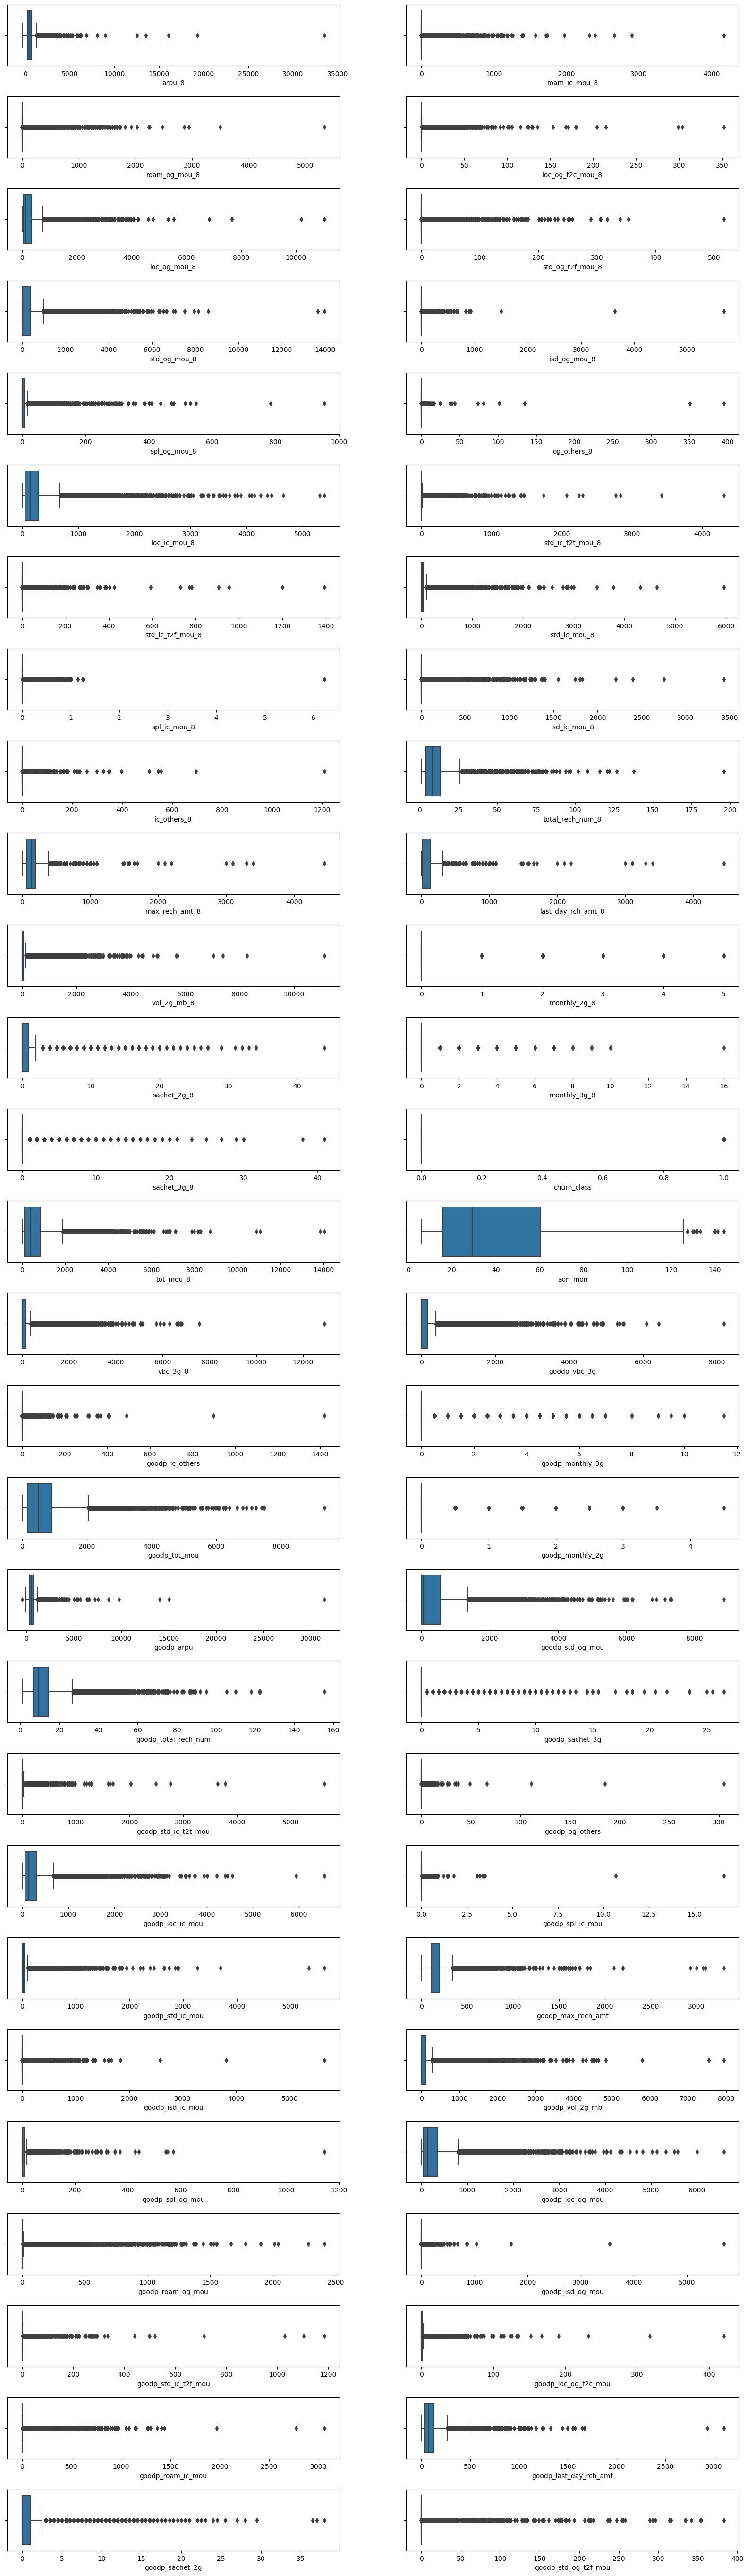

In [71]:
fig, axes = plt.subplots(28,2, figsize=(20, 70))
for index, col in enumerate(column_names):
    i, j = divmod(index, 2)
    sns.boxplot(df2[col], ax=axes[i, j])
    
plt.subplots_adjust(hspace=0.5) 
plt.show()

- We can cap some features direcly from the analysis of the 56 columns in the above charts. We need to bear in mind that some of our analysis/selected columns for capping/capping values, are based on visual interpretation and continuity in outliers. Some we couldn't do it right away without analysing them further as these could be a reality. For eg data on roaming

In [72]:
df2.aon_mon.max()

144.03

- Overall data shows that most users are in the <40 month range. However we can also see that there are some long term user also, with a second peak between 80-120 months.
- However, for only the churn customers, it is clearly laden towards the <40 month range. In fact, more one the <20 month period. This means the churn customers are mostly recent ones and not the long time users.

In [73]:
churn_data=df2[(df2['churn_class'] ==1)]

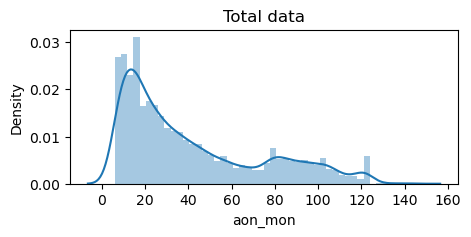

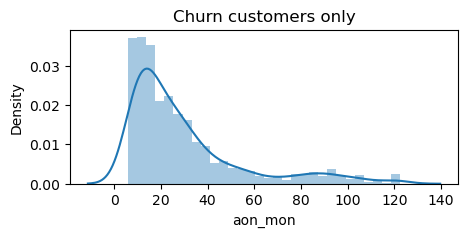

In [74]:
plt.figure(figsize=(5,2))
sns.distplot(df2['aon_mon'])
plt.title('Total data')

plt.figure(figsize=(5,2))
sns.distplot(churn_data['aon_mon'])
plt.title('Churn customers only')
plt.show()

- Let's just check if there is any relation with the customer spends - Average Revenue per user
- Here overall we do not see any major differences amongst the total consumers and consumers who have churned, except that the churn customers have a slightly higher concentration in the less than 500 mark and that it is quite well distributed, unlike the overall data. 

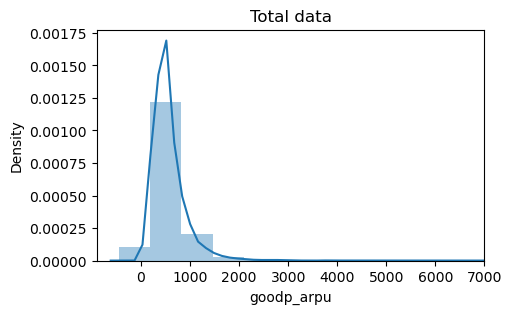

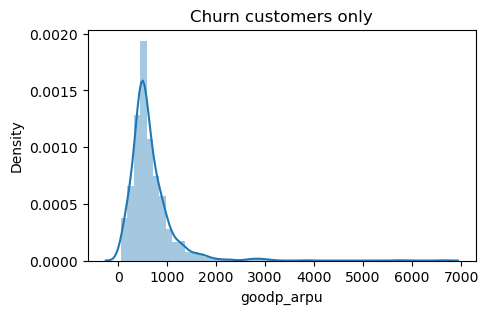

In [75]:
plt.figure(figsize=(5,3))
sns.distplot(df2['goodp_arpu'])
plt.xlim(-900,7000)
plt.title('Total data')

plt.figure(figsize=(5,3))
sns.distplot(churn_data['goodp_arpu'])
plt.title('Churn customers only')
plt.show()

- Customers who have higher minutes of usage are the ones who are churning out, compared to the overall customer base.

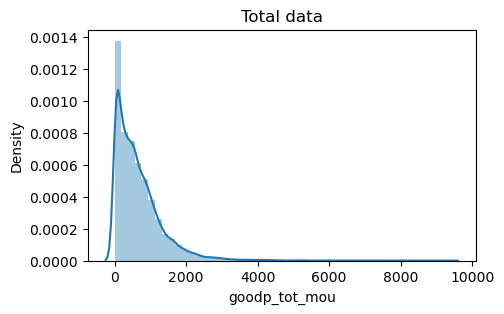

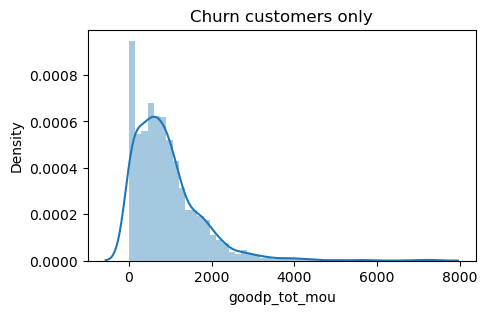

In [76]:
plt.figure(figsize=(5,3))
sns.distplot(df2.goodp_tot_mou)
plt.title('Total data')

plt.figure(figsize=(5,3))
sns.distplot(churn_data.goodp_tot_mou)
plt.title('Churn customers only')
plt.show()

- Clearly some outliers in the data in the charts below, make it a little difficult to interpret. 

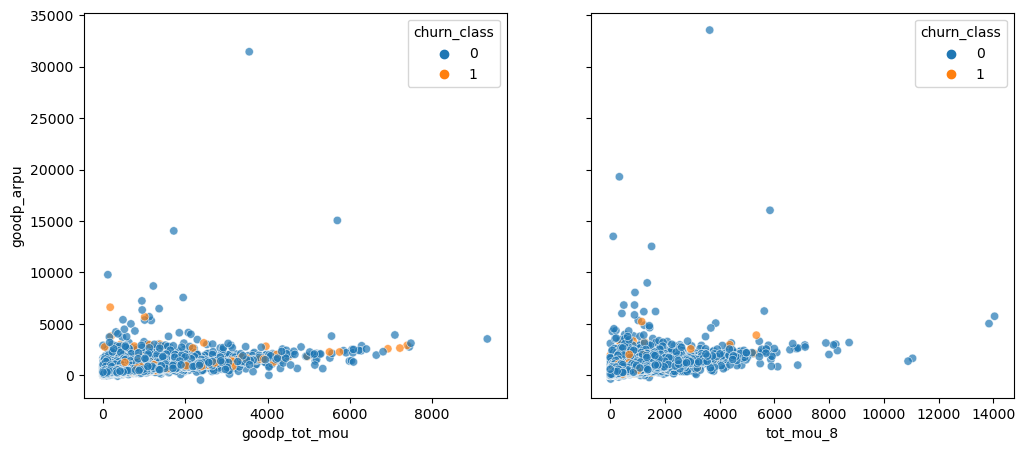

In [77]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))
sns.scatterplot(y='goodp_arpu', x='goodp_tot_mou', data=df2, ax=axes[0], hue='churn_class', alpha=0.7)
sns.scatterplot(y='arpu_8', x='tot_mou_8', data=df2, ax=axes[1], hue='churn_class', alpha=0.7)
plt.show()

- Post limiting the data: 
We observe that the customers in the good phase, had higher minutes of usage but their average revenue was lower than 3000. 
But when we compare this with the month of Aug (i.e, just a month before the churn), we observe that the minutes of usage a way lower, although the avg revenues still continue to be <3000.

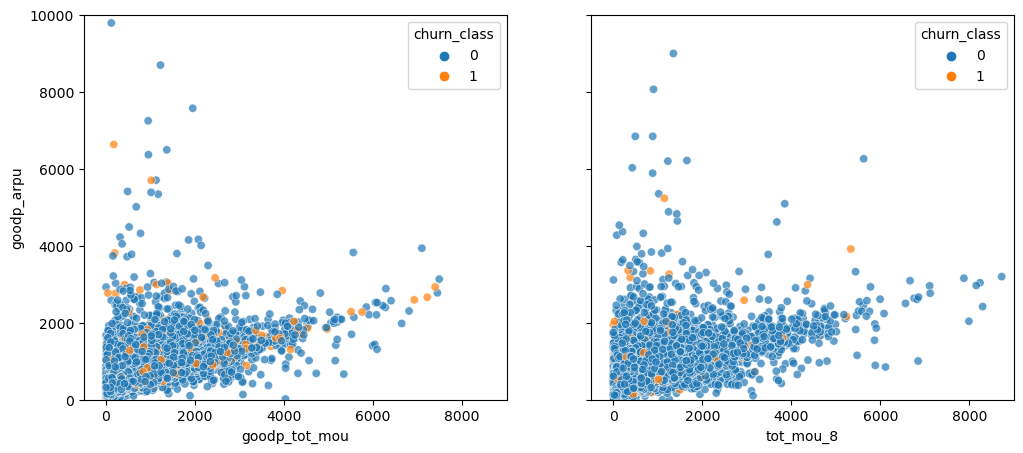

In [78]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))
sns.scatterplot(y='goodp_arpu', x='goodp_tot_mou', data=df2, ax=axes[0], hue='churn_class', alpha=0.7)
sns.scatterplot(y='arpu_8', x='tot_mou_8', data=df2, ax=axes[1], hue='churn_class', alpha=0.7)
plt.ylim(0,10000)
axes[0].set_xlim (-500, 9000)
axes[1].set_xlim (-500, 9000)
plt.show()


- No major insights from VBC information. Charts below

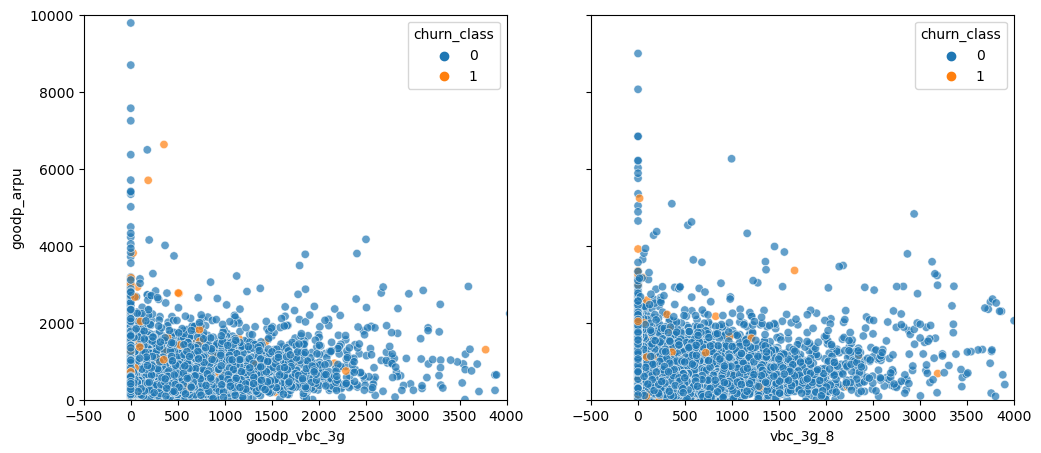

In [79]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))
sns.scatterplot(y='goodp_arpu', x='goodp_vbc_3g', data=df2, ax=axes[0], hue='churn_class', alpha=0.7)
sns.scatterplot(y='arpu_8', x='vbc_3g_8', data=df2, ax=axes[1], hue='churn_class', alpha=0.7)
plt.ylim(0,10000)
axes[0].set_xlim (-500, 4000)
axes[1].set_xlim (-500, 4000)
plt.show()

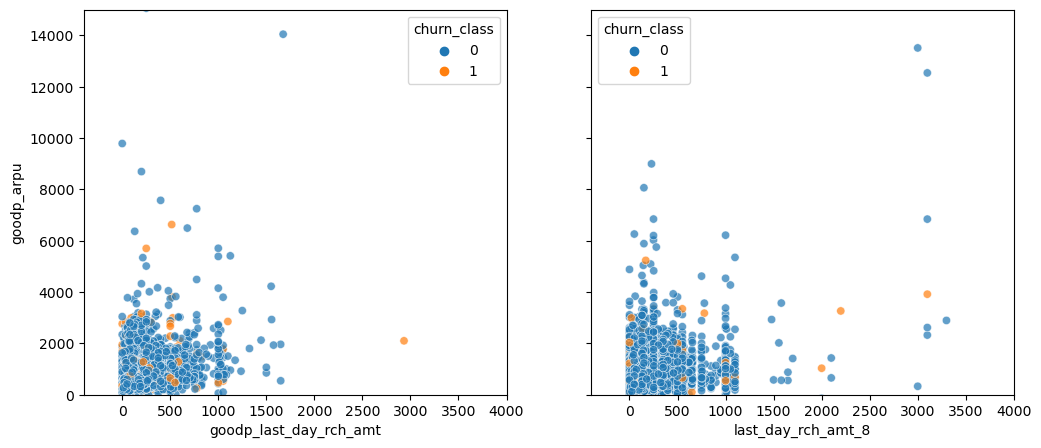

In [80]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))
sns.scatterplot(y='goodp_arpu', x='goodp_last_day_rch_amt', data=df2, ax=axes[0], hue='churn_class', alpha=0.7)
sns.scatterplot(y='arpu_8', x='last_day_rch_amt_8', data=df2, ax=axes[1], hue='churn_class', alpha=0.7)
plt.ylim(0,15000)
axes[0].set_xlim (-400, 4000)
axes[1].set_xlim (-400, 4000)
plt.show()

- From the charts below, we can see that the number recharges by the churn customers in the good phase were spread across, upto 80. However, this was considerably low in the month of Aug (Just a month before the churn). 
- This in a way indicates that customers who are staying with the service provider are likely to have a higher frequency of recharge.
- We can see the non churn customers mostly maintaining the recharge frequency spread.

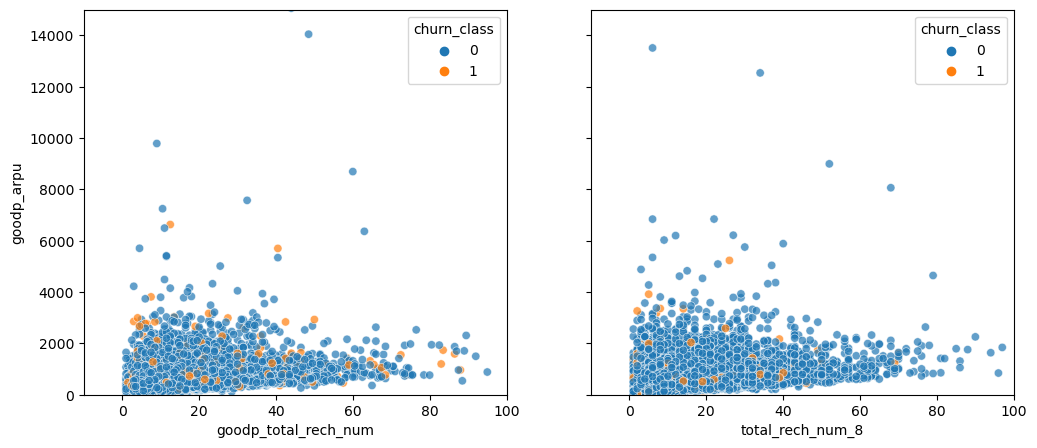

In [81]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))
sns.scatterplot(y='goodp_arpu', x='goodp_total_rech_num', data=df2, ax=axes[0], hue='churn_class', alpha=0.7)
sns.scatterplot(y='arpu_8', x='total_rech_num_8', data=df2, ax=axes[1], hue='churn_class', alpha=0.7)
plt.ylim(0,15000)
axes[0].set_xlim (-10, 100)
axes[1].set_xlim (-10, 100)
plt.show()

- The 2g Vol of Data usage during Good phase is quite spread across. However, it becomes way scewed towards the lesser amounts in the Action phase (Aug month), amongst the Churn consumers

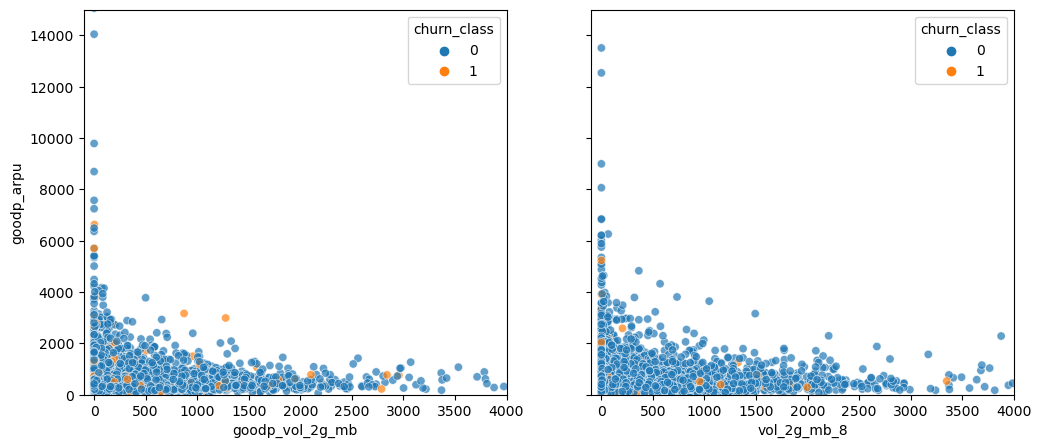

In [82]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))
sns.scatterplot(y='goodp_arpu', x='goodp_vol_2g_mb', data=df2, ax=axes[0], hue='churn_class', alpha=0.7)
sns.scatterplot(y='arpu_8', x='vol_2g_mb_8', data=df2, ax=axes[1], hue='churn_class', alpha=0.7)
plt.ylim(0,15000)
axes[0].set_xlim (-100, 4000)
axes[1].set_xlim (-100, 4000)
plt.show()

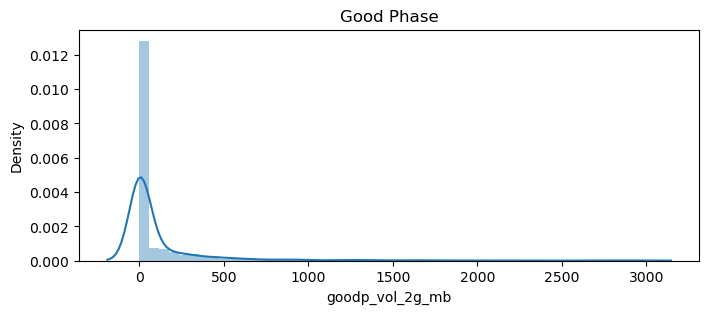

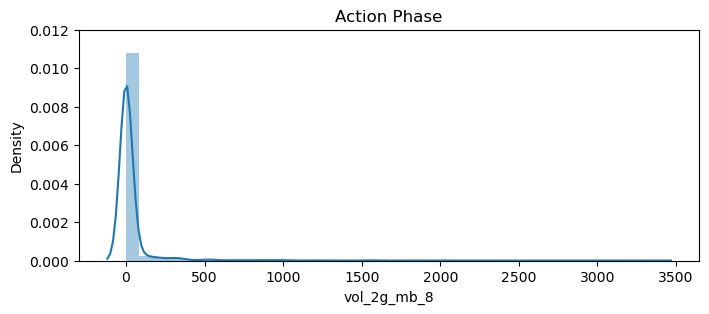

In [83]:
fig, axes = plt.subplots(1, 1, sharey=True, figsize=(8, 3))
sns.distplot(churn_data.goodp_vol_2g_mb)
plt.title('Good Phase')
fig, axes = plt.subplots(1, 1, sharey=True, figsize=(8, 3))
sns.distplot(churn_data.vol_2g_mb_8)
plt.title('Action Phase')
plt.ylim(0,0.012)
plt.show()

- In the charts below, we have checked the patterns of local incoming and outgoing calls, both, during good phase and churn phase. 
- It is quite clear in the two charts below, that in the Action phase, we witness are drop in local outgoing and incoming calls

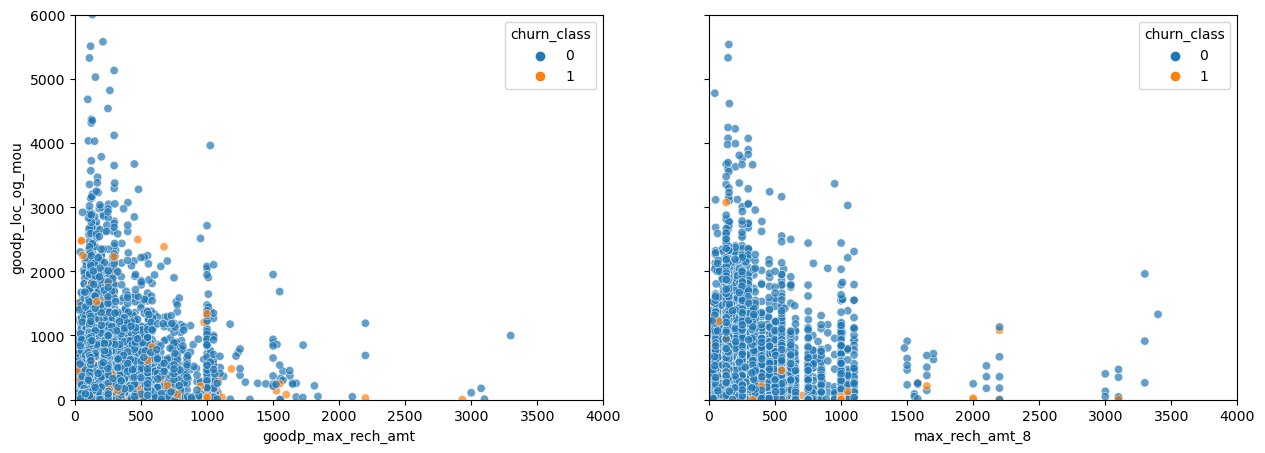

In [84]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))
sns.scatterplot(x='goodp_max_rech_amt', y='goodp_loc_og_mou', data=df2, ax=axes[0],
                hue='churn_class', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='loc_og_mou_8', data=df2, ax=axes[1], hue='churn_class', alpha=0.7)
axes[0].set_xlim(0,4000)
axes[1].set_xlim(0,4000)
plt.ylim(0,6000)

plt.show()

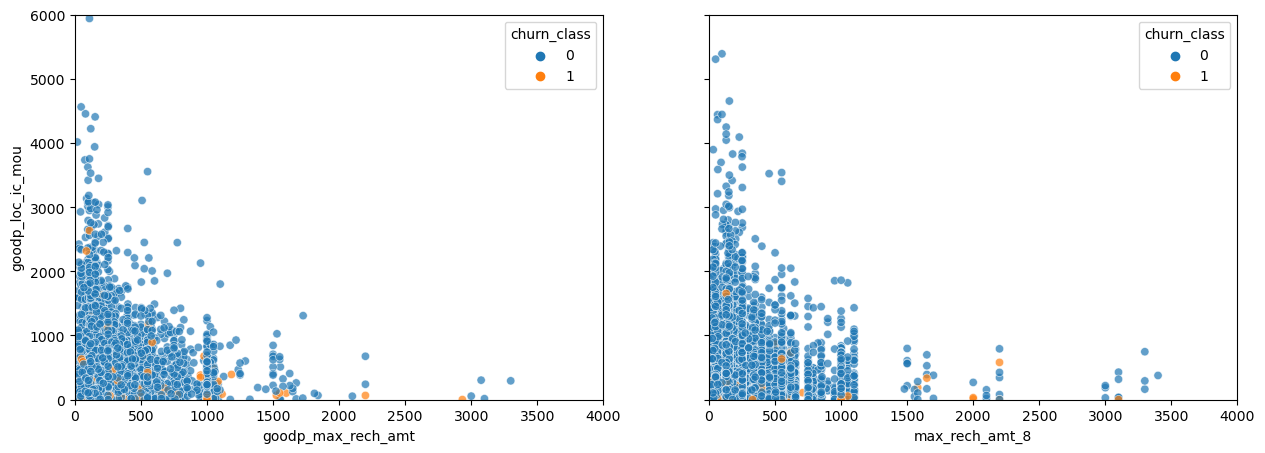

In [85]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
sns.scatterplot(x='goodp_max_rech_amt', y='goodp_loc_ic_mou', data=df2, ax=axes[0],
                hue='churn_class', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='loc_ic_mou_8', data=df2, ax=axes[1], hue='churn_class', alpha=0.7)
axes[0].set_xlim(0,4000)
axes[1].set_xlim(0,4000)
plt.ylim(0,6000)

plt.show()

- A stark difference can be seen in the Outgoing STD calls amongst the churn customers during the Good phase and Action Phase. 
- In Action phase, it completely drops, while in good phase a considerable amount of outgoing STD calls are made 
- Incoming STD calls also see a drop but then it is not very clearly distinguishable.

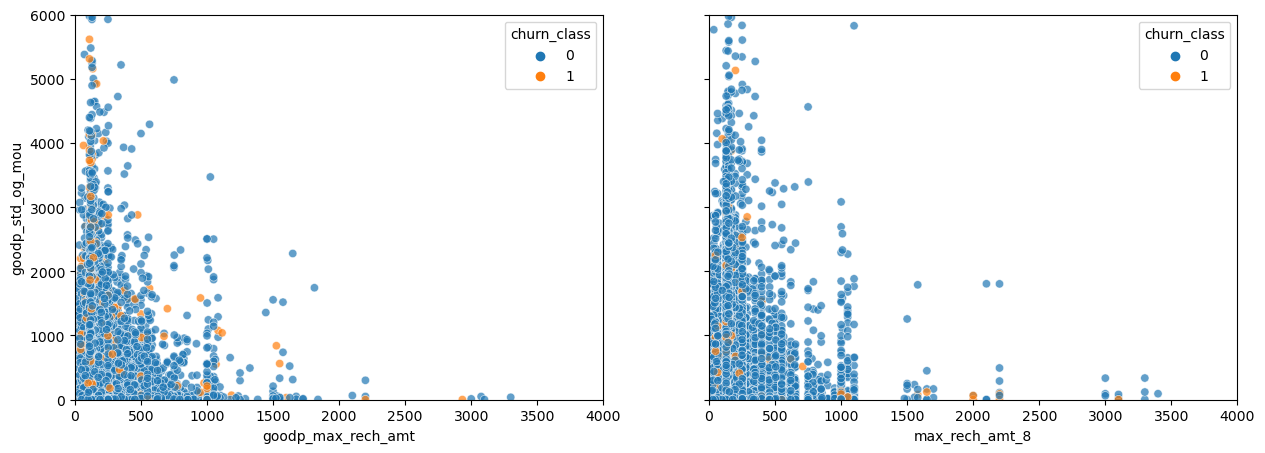

In [86]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
sns.scatterplot(x='goodp_max_rech_amt', y='goodp_std_og_mou', data=df2, ax=axes[0],
                hue='churn_class', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='std_og_mou_8', data=df2, ax=axes[1], hue='churn_class', alpha=0.7)
axes[0].set_xlim(0,4000)
axes[1].set_xlim(0,4000)
plt.ylim(0,6000)

plt.show()

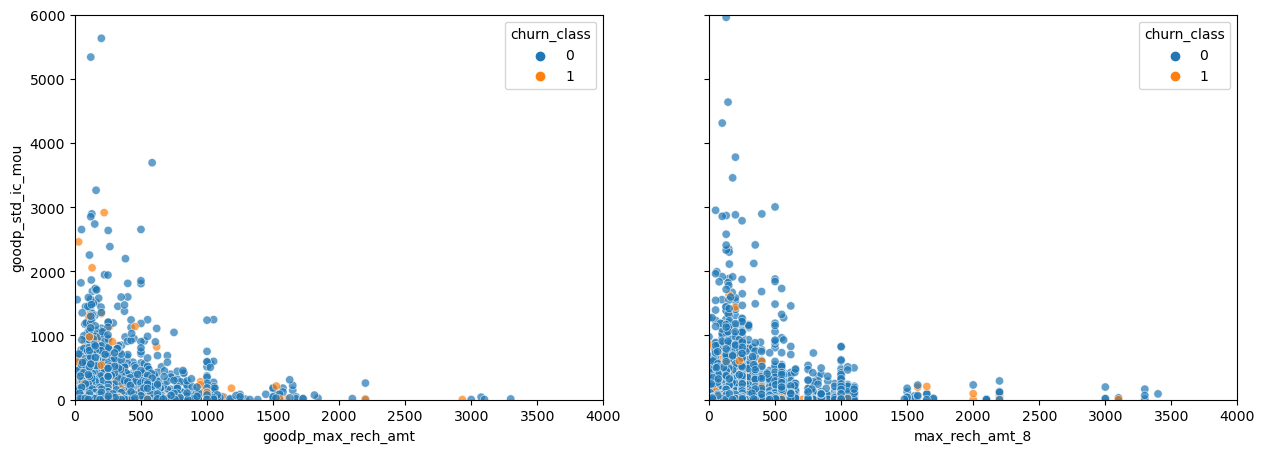

In [87]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))
sns.scatterplot(x='goodp_max_rech_amt', y='goodp_std_ic_mou', data=df2, ax=axes[0],
                hue='churn_class', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='std_ic_mou_8', data=df2, ax=axes[1], hue='churn_class', alpha=0.7)
axes[0].set_xlim(0,4000)
axes[1].set_xlim(0,4000)
plt.ylim(0,6000)

plt.show()

- We can witness an increase in the Churn customers that their call volumes to their own Call centre increases from the good phase to the churn phase. 
- This could indicate that they were having more conversations with call centre to resolve issues / negotiate.
- It is clearly visible in the second chart with only the churn customers plotted on the distplot

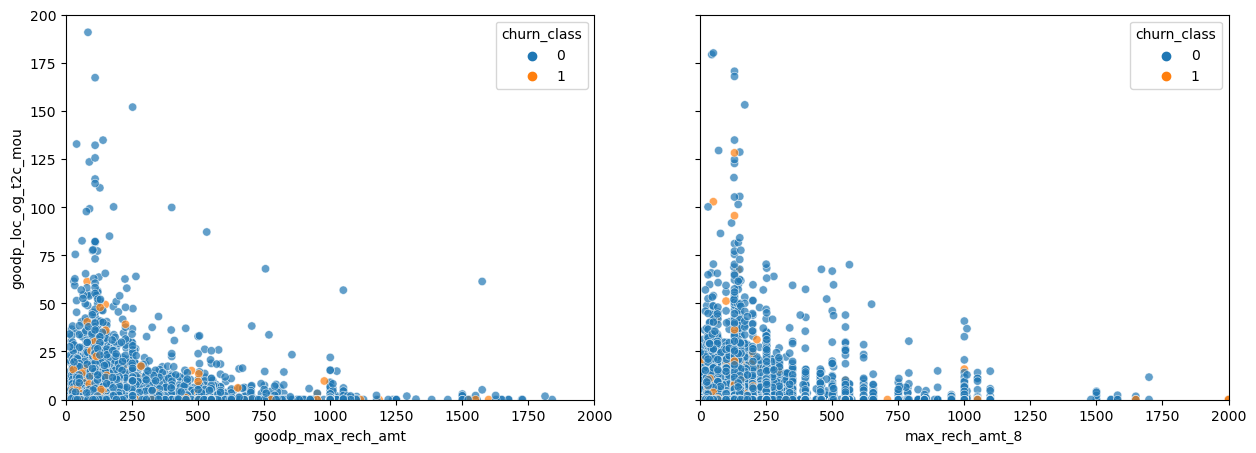

In [88]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))
sns.scatterplot(x='goodp_max_rech_amt', y='goodp_loc_og_t2c_mou', data=df2, ax=axes[0],
                hue='churn_class', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='loc_og_t2c_mou_8', data=df2, ax=axes[1], hue='churn_class', alpha=0.7)

axes[0].set_xlim(0,2000)
axes[1].set_xlim(0,2000)
plt.ylim(0,200)

plt.show()

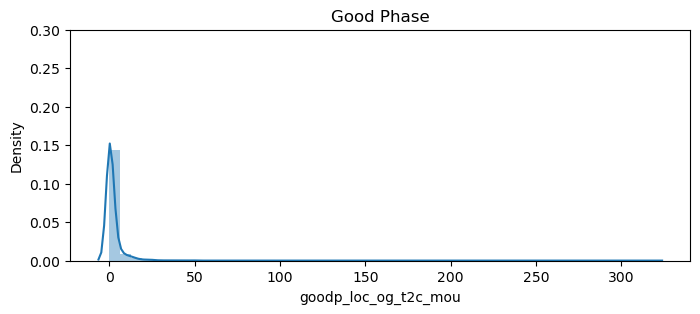

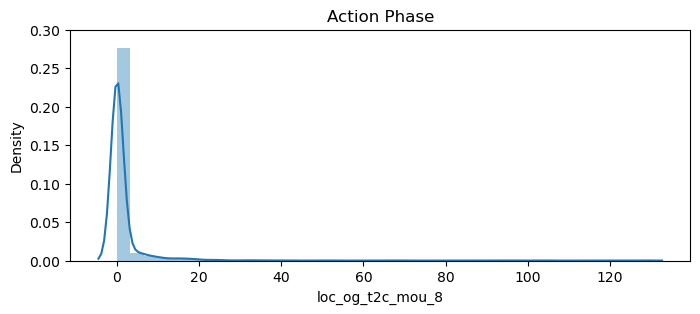

In [89]:
fig, axes = plt.subplots(1, 1, sharey=True, figsize=(8, 3))
sns.distplot(churn_data.goodp_loc_og_t2c_mou)
plt.title('Good Phase')
plt.ylim(0,0.30)
fig, axes = plt.subplots(1, 1, sharey=True, figsize=(8, 3))
sns.distplot(churn_data.loc_og_t2c_mou_8)
plt.title('Action Phase')
plt.ylim(0,0.30)
plt.show()

## Preparing the data for modeling

In [90]:
col_cap = [('arpu_8', 7000), ('loc_og_mou_8', 4000), ('max_rech_amt_8', 1000 ), ('last_day_rch_amt_8', 1000 ), 
               ('aon_mon', 120), ('tot_mou_8', 4000), ('goodp_loc_ic_mou', 3000), ('goodp_last_day_rch_amt', 1000 ), 
               ('goodp_std_og_mou', 4000), ('goodp_max_rech_amt', 1500), ('goodp_loc_og_mou', 3000), ('goodp_arpu', 7000)]


In [91]:
for col_cap, value in col_cap:
    df2[col] = df2[col].apply(lambda x : x if x < value else value)

In [92]:
df2.describe().round()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,churn_class,tot_mou_8,aon_mon,vbc_3g_8,goodp_vbc_3g,goodp_ic_others,goodp_monthly_3g,goodp_tot_mou,goodp_monthly_2g,goodp_arpu,goodp_std_og_mou,goodp_total_rech_num,goodp_sachet_3g,goodp_std_ic_t2t_mou,goodp_og_others,goodp_loc_ic_mou,goodp_spl_ic_mou,goodp_std_ic_mou,goodp_max_rech_amt,goodp_isd_ic_mou,goodp_vol_2g_mb,goodp_spl_og_mou,goodp_loc_og_mou,goodp_roam_og_mou,goodp_isd_og_mou,goodp_std_ic_t2f_mou,goodp_loc_og_t2c_mou,goodp_roam_ic_mou,goodp_last_day_rch_amt,goodp_sachet_2g,goodp_std_og_t2f_mou
count,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0
mean,529.0,13.0,21.0,2.0,248.0,2.0,322.0,2.0,7.0,0.0,236.0,15.0,3.0,47.0,0.0,11.0,1.0,10.0,165.0,95.0,110.0,0.0,1.0,0.0,0.0,0.0,597.0,41.0,174.0,169.0,1.0,0.0,656.0,0.0,567.0,363.0,12.0,0.0,16.0,0.0,241.0,0.0,49.0,168.0,11.0,128.0,7.0,263.0,24.0,2.0,3.0,2.0,15.0,99.0,1.0,2.0
std,500.0,76.0,108.0,7.0,367.0,11.0,615.0,46.0,21.0,3.0,313.0,73.0,20.0,142.0,0.0,72.0,13.0,9.0,169.0,142.0,318.0,0.0,3.0,1.0,1.0,0.0,706.0,32.0,425.0,396.0,14.0,1.0,658.0,0.0,432.0,587.0,9.0,1.0,77.0,3.0,303.0,0.0,135.0,148.0,75.0,304.0,18.0,362.0,94.0,46.0,18.0,7.0,66.0,108.0,2.0,9.0
min,-345.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,-452.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,258.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,51.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,67.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,16.0,0.0,0.0,0.0,0.0,179.0,0.0,356.0,2.0,6.0,0.0,0.0,0.0,63.0,0.0,3.0,104.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0
50%,445.0,0.0,0.0,0.0,124.0,0.0,35.0,0.0,1.0,0.0,140.0,0.0,0.0,11.0,0.0,0.0,0.0,8.0,140.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,387.0,29.0,0.0,0.0,0.0,0.0,499.0,0.0,490.0,67.0,10.0,0.0,2.0,0.0,148.0,0.0,15.0,128.0,0.0,7.0,2.0,141.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0,0.0
75%,675.0,0.0,0.0,0.0,325.0,0.0,393.0,0.0,7.0,0.0,299.0,8.0,0.0,41.0,0.0,0.0,0.0,13.0,198.0,130.0,59.0,0.0,1.0,0.0,0.0,0.0,827.0,60.0,142.0,158.0,0.0,0.0,923.0,0.0,682.0,544.0,14.0,0.0,10.0,0.0,308.0,0.0,46.0,198.0,1.0,110.0,7.0,347.0,3.0,0.0,1.0,1.0,2.0,124.0,1.0,0.0
max,33544.0,4170.0,5337.0,352.0,11040.0,517.0,13980.0,5682.0,955.0,395.0,5389.0,4309.0,1395.0,5957.0,6.0,3433.0,1210.0,196.0,4449.0,4449.0,11118.0,5.0,44.0,16.0,41.0,1.0,14043.0,144.0,12916.0,8191.0,1420.0,12.0,9344.0,4.0,31438.0,8856.0,156.0,26.0,5630.0,305.0,6557.0,17.0,5630.0,3299.0,5651.0,7939.0,1144.0,6582.0,2411.0,5695.0,1185.0,421.0,3061.0,3100.0,38.0,120.0


#### Splitting data as X and y with dependent and independent variable

In [93]:
y = df2['churn_class']
X = df2.drop('churn_class', axis=1)

In [94]:
y.shape

(28163,)

In [95]:
X.shape

(28163, 55)

#### Managing Class imbalance

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [97]:
df2.churn_class.value_counts(normalize=True)

0    0.945389
1    0.054611
Name: churn_class, dtype: float64

In [98]:
!pip install imbalanced-learn

In [99]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [100]:
y_res.value_counts()

1    26625
0    26625
Name: churn_class, dtype: int64

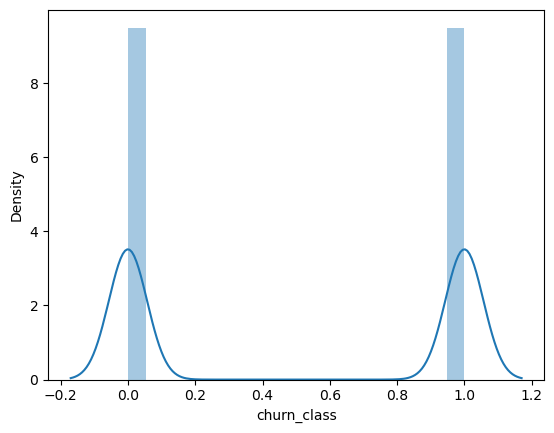

In [101]:
sns.distplot(y_res)
plt.show()

#### Splitting the data into Train and Test. Also using RFE for feature selection

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.7, test_size=0.3, random_state=25)

In [103]:
import statsmodels.api as sm

In [104]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            churn_class   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37219
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15887.
Date:                Tue, 14 Nov 2023   Deviance:                       31774.
Time:                        15:00:35   Pearson chi2:                 4.71e+08
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4137
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.6143      0.025    -64.152      0.000      -1.664      -1.565
arpu_8                     0.0753      0.051      1.468      0.142      -0.025       0.176
roam_ic_mou_8              0.0042      0.017      0.240      0.810      -0.030       0.038
roam_og_mou_8              0.7868      0.306      2.572      0.010       0.187       1.386
loc_og_t2c_mou_8           0.1693      0.025      6.704      0.000       0.120       0.219
loc_og_mou_8               1.5268      1.041      1.467      0.142      -0.513       3.567
std_og_t2f_mou_8          -0.1704      0.043     -3.958      0.000      -0.255      -0.086
std_og_mou_8               3.3790      1.739      1.943      0.052      -0.029       6.787
isd_og_mou_8               0.1331      0.125      1.069      0.285      -0.111       0.377
spl_og_mou_8              -0.2258      0.058     -3.876      0.000      -0.340      -0.112
og_others_8                0.0731      0.018      4.140      0.000       0.038       0.108
loc_ic_mou_8              -1.6766      0.067    -25.068      0.000      -1.808      -1.546
std_ic_t2t_mou_8          -0.3013      0.061     -4.939      0.000      -0.421      -0.182
std_ic_t2f_mou_8          -0.1259      0.062     -2.029      0.042      -0.248      -0.004
std_ic_mou_8              -0.4447      0.059     -7.525      0.000      -0.561      -0.329
spl_ic_mou_8              -0.3365      0.025    -13.315      0.000      -0.386      -0.287
isd_ic_mou_8              -0.1787      0.033     -5.370      0.000      -0.244      -0.113
ic_others_8                0.0665      0.038      1.733      0.083      -0.009       0.142
total_rech_num_8          -0.4227      0.035    -12.020      0.000      -0.492      -0.354
max_rech_amt_8             0.2271      0.027      8.493      0.000       0.175       0.280
last_day_rch_amt_8        -0.5142      0.025    -20.562      0.000      -0.563      -0.465
vol_2g_mb_8               -0.2585      0.033     -7.890      0.000      -0.323      -0.194
monthly_2g_8              -0.5831      0.032    -18.435      0.000      -0.645      -0.521
sachet_2g_8               -0.5838      0.033    -17.709      0.000      -0.648      -0.519
monthly_3g_8              -0.8238      0.041    -20.207      0.000      -0.904      -0.744
sachet_3g_8               -0.2851      0.036     -7.867      0.000      -0.356      -0.214
tot_mou_8                 -4.4511      1.991     -2.236      0.025      -8.353      -0.549
aon_mon                   -0.3155      0.018    -17.702      0.000      -0.350      -0.281
vbc_3g_8                  -0.1673      0.036     -4.605      0.000      -0.239      -0.096
goodp_vbc_3g               0.0690      0.030      2.300      0.021       0.010       0.128
goodp_ic_others           -0.3390      0.069     -4.913      0.000      -0.474  

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression(solver='liblinear')

rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [106]:
rfe_col = X.columns[rfe.support_]
rfe_col

Index(['roam_og_mou_8', 'std_og_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'tot_mou_8', 'aon_mon', 'goodp_tot_mou',
       'goodp_monthly_2g', 'goodp_total_rech_num', 'goodp_std_ic_t2t_mou',
       'goodp_loc_ic_mou'],
      dtype='object')

In [107]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            churn_class   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37254
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16182.
Date:                Tue, 14 Nov 2023   Deviance:                       32363.
Time:                        15:00:54   Pearson chi2:                 3.83e+09
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4043
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.5430      0.024    -63.916      0.000      -1.590      -1.496
roam_og_mou_8            0.4446      0.018     24.497      0.000       0.409       0.480
std_og_mou_8             0.7468      0.061     12.335      0.000       0.628       0.865
loc_ic_mou_8            -1.6915      0.064    -26.635      0.000      -1.816      -1.567
std_ic_t2t_mou_8        -0.3328      0.057     -5.845      0.000      -0.444      -0.221
std_ic_mou_8            -0.3968      0.042     -9.494      0.000      -0.479      -0.315
spl_ic_mou_8            -0.3662      0.025    -14.607      0.000      -0.415      -0.317
total_rech_num_8        -0.5413      0.032    -16.796      0.000      -0.604      -0.478
max_rech_amt_8           0.2951      0.022     13.644      0.000       0.253       0.337
last_day_rch_amt_8      -0.5199      0.024    -22.015      0.000      -0.566      -0.474
vol_2g_mb_8             -0.1259      0.028     -4.551      0.000      -0.180      -0.072
monthly_2g_8            -0.6292      0.030    -20.752      0.000      -0.689      -0.570
sachet_2g_8             -0.5627      0.026    -21.683      0.000      -0.614      -0.512
monthly_3g_8            -0.7424      0.031    -24.047      0.000      -0.803      -0.682
tot_mou_8               -1.4080      0.073    -19.388      0.000      -1.550      -1.266
aon_mon                 -0.3201      0.017    -18.533      0.000      -0.354      -0.286
goodp_tot_mou            0.5059      0.025     20.241      0.000       0.457       0.555
goodp_monthly_2g        -0.1316      0.021     -6.208      0.000      -0.173      -0.090
goodp_total_rech_num     0.2878      0.025     11.382      0.000       0.238       0.337
goodp_std_ic_t2t_mou     0.2630      0.026      9.938      0.000       0.211       0.315
goodp_loc_ic_mou         0.6405      0.042     15.403      0.000       0.559       0.722
========================================================================================
"""

### Predicted vs Actual

In [108]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.873634,1
1,0,0.691742,1
2,1,0.796911,1
3,0,0.044883,0
4,1,0.851105,1


#### Confution Matrix and Accuracy

In [109]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()


print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14743  3843]
 [ 2958 15731]]

Accuracy : 0.8175452716297786


In [110]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,tot_mou_8,8.15
1,std_og_mou_8,6.14
2,loc_ic_mou_8,3.93
19,goodp_loc_ic_mou,3.19
6,total_rech_num_8,2.83
3,std_ic_t2t_mou_8,2.26
17,goodp_total_rech_num,2.24
15,goodp_tot_mou,2.19
7,max_rech_amt_8,2.18
8,last_day_rch_amt_8,2.03


### Iteration-1

In [111]:
rfe_col = rfe_col.drop('tot_mou_8', 1)

In [112]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            churn_class   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37255
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16416.
Date:                Tue, 14 Nov 2023   Deviance:                       32832.
Time:                        15:00:56   Pearson chi2:                 5.18e+09
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3968
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.5621      0.024    -63.921      0.000      -1.610      -1.514
roam_og_mou_8            0.2866      0.016     17.684      0.000       0.255       0.318
std_og_mou_8            -0.2675      0.024    -11.006      0.000      -0.315      -0.220
loc_ic_mou_8            -2.2614      0.060    -37.858      0.000      -2.378      -2.144
std_ic_t2t_mou_8        -0.3725      0.058     -6.454      0.000      -0.486      -0.259
std_ic_mou_8            -0.3821      0.042     -9.161      0.000      -0.464      -0.300
spl_ic_mou_8            -0.3602      0.025    -14.396      0.000      -0.409      -0.311
total_rech_num_8        -0.7305      0.031    -23.201      0.000      -0.792      -0.669
max_rech_amt_8           0.2386      0.021     11.319      0.000       0.197       0.280
last_day_rch_amt_8      -0.5513      0.024    -23.248      0.000      -0.598      -0.505
vol_2g_mb_8             -0.1165      0.028     -4.227      0.000      -0.170      -0.062
monthly_2g_8            -0.6179      0.030    -20.397      0.000      -0.677      -0.559
sachet_2g_8             -0.5437      0.026    -20.792      0.000      -0.595      -0.492
monthly_3g_8            -0.7176      0.031    -23.368      0.000      -0.778      -0.657
aon_mon                 -0.3393      0.017    -19.825      0.000      -0.373      -0.306
goodp_tot_mou            0.2966      0.021     14.073      0.000       0.255       0.338
goodp_monthly_2g        -0.1422      0.021     -6.689      0.000      -0.184      -0.101
goodp_total_rech_num     0.3983      0.025     15.953      0.000       0.349       0.447
goodp_std_ic_t2t_mou     0.2859      0.027     10.500      0.000       0.233       0.339
goodp_loc_ic_mou         0.7056      0.042     16.699      0.000       0.623       0.788
========================================================================================
"""

In [113]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.869626,1
1,0,0.696515,1
2,1,0.808180,1
3,0,0.041176,0
4,1,0.859170,1


In [114]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14598  3988]
 [ 2972 15717]]

Accuracy : 0.8132796780684105


### Accuracy hasn't changed much with the drop in variable 

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,loc_ic_mou_8,3.55
18,goodp_loc_ic_mou,3.19
6,total_rech_num_8,2.57
3,std_ic_t2t_mou_8,2.26
16,goodp_total_rech_num,2.16
7,max_rech_amt_8,2.15
8,last_day_rch_amt_8,2.02
1,std_og_mou_8,2.00
14,goodp_tot_mou,1.93
4,std_ic_mou_8,1.80


- vol_2g_mb_8, has the lowest coefficient. Let's check if dropping this variable will make any change to the overall accuracy

## Iteration -2

In [117]:
rfe_col = rfe_col.drop('vol_2g_mb_8', 1)

In [118]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            churn_class   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37256
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16426.
Date:                Tue, 14 Nov 2023   Deviance:                       32852.
Time:                        15:03:15   Pearson chi2:                 5.46e+09
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3965
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.5634      0.024    -63.872      0.000      -1.611      -1.515
roam_og_mou_8            0.2864      0.016     17.664      0.000       0.255       0.318
std_og_mou_8            -0.2668      0.024    -10.992      0.000      -0.314      -0.219
loc_ic_mou_8            -2.2623      0.060    -37.877      0.000      -2.379      -2.145
std_ic_t2t_mou_8        -0.3735      0.058     -6.473      0.000      -0.487      -0.260
std_ic_mou_8            -0.3839      0.042     -9.195      0.000      -0.466      -0.302
spl_ic_mou_8            -0.3613      0.025    -14.436      0.000      -0.410      -0.312
total_rech_num_8        -0.7303      0.031    -23.224      0.000      -0.792      -0.669
max_rech_amt_8           0.2371      0.021     11.254      0.000       0.196       0.278
last_day_rch_amt_8      -0.5510      0.024    -23.222      0.000      -0.598      -0.505
monthly_2g_8            -0.6587      0.029    -22.672      0.000      -0.716      -0.602
sachet_2g_8             -0.5776      0.025    -23.053      0.000      -0.627      -0.528
monthly_3g_8            -0.7341      0.031    -23.996      0.000      -0.794      -0.674
aon_mon                 -0.3379      0.017    -19.739      0.000      -0.371      -0.304
goodp_tot_mou            0.2995      0.021     14.222      0.000       0.258       0.341
goodp_monthly_2g        -0.1505      0.021     -7.123      0.000      -0.192      -0.109
goodp_total_rech_num     0.3959      0.025     15.903      0.000       0.347       0.445
goodp_std_ic_t2t_mou     0.2875      0.027     10.583      0.000       0.234       0.341
goodp_loc_ic_mou         0.7102      0.042     16.808      0.000       0.627       0.793
========================================================================================
"""

In [119]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.869115,1
1,0,0.695412,1
2,1,0.807540,1
3,0,0.041252,0
4,1,0.858227,1


In [120]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14589  3997]
 [ 2975 15714]]

Accuracy : 0.8129577464788732


In [121]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,loc_ic_mou_8,3.55
17,goodp_loc_ic_mou,3.19
6,total_rech_num_8,2.57
3,std_ic_t2t_mou_8,2.26
15,goodp_total_rech_num,2.16
7,max_rech_amt_8,2.15
8,last_day_rch_amt_8,2.02
1,std_og_mou_8,2.00
13,goodp_tot_mou,1.92
4,std_ic_mou_8,1.80


- Since the p values do not show any variable that can be deleted and neither does VIF show any parameter beyond the threshold of 5, we will consider the parameter that has their coefficient closest to 0. 
- In this case it is - goodp_monthly_2g

## Iteration -3

In [122]:
rfe_col = rfe_col.drop('goodp_monthly_2g', 1)

In [123]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            churn_class   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37257
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16451.
Date:                Tue, 14 Nov 2023   Deviance:                       32903.
Time:                        15:04:24   Pearson chi2:                 5.27e+09
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3956
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.5609      0.024    -63.790      0.000      -1.609      -1.513
roam_og_mou_8            0.2899      0.016     17.842      0.000       0.258       0.322
std_og_mou_8            -0.2662      0.024    -10.978      0.000      -0.314      -0.219
loc_ic_mou_8            -2.2653      0.060    -37.883      0.000      -2.382      -2.148
std_ic_t2t_mou_8        -0.3745      0.058     -6.503      0.000      -0.487      -0.262
std_ic_mou_8            -0.3796      0.042     -9.104      0.000      -0.461      -0.298
spl_ic_mou_8            -0.3596      0.025    -14.371      0.000      -0.409      -0.311
total_rech_num_8        -0.7326      0.031    -23.284      0.000      -0.794      -0.671
max_rech_amt_8           0.2401      0.021     11.394      0.000       0.199       0.281
last_day_rch_amt_8      -0.5511      0.024    -23.213      0.000      -0.598      -0.505
monthly_2g_8            -0.7492      0.026    -28.326      0.000      -0.801      -0.697
sachet_2g_8             -0.5676      0.025    -22.726      0.000      -0.617      -0.519
monthly_3g_8            -0.7349      0.031    -24.035      0.000      -0.795      -0.675
aon_mon                 -0.3360      0.017    -19.648      0.000      -0.369      -0.302
goodp_tot_mou            0.3132      0.021     14.918      0.000       0.272       0.354
goodp_total_rech_num     0.4077      0.025     16.387      0.000       0.359       0.456
goodp_std_ic_t2t_mou     0.2882      0.027     10.578      0.000       0.235       0.342
goodp_loc_ic_mou         0.7045      0.042     16.658      0.000       0.622       0.787
========================================================================================
"""

In [124]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.865568,1
1,0,0.684145,1
2,1,0.803311,1
3,0,0.039175,0
4,1,0.856735,1


In [125]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14582  4004]
 [ 2950 15739]]

Accuracy : 0.813440643863179


In [127]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,loc_ic_mou_8,3.55
16,goodp_loc_ic_mou,3.19
6,total_rech_num_8,2.57
3,std_ic_t2t_mou_8,2.26
14,goodp_total_rech_num,2.15
7,max_rech_amt_8,2.15
8,last_day_rch_amt_8,2.02
1,std_og_mou_8,2.00
13,goodp_tot_mou,1.91
4,std_ic_mou_8,1.80


### Iteration -4

In [128]:
rfe_col = rfe_col.drop('roam_og_mou_8', 1)

In [129]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            churn_class   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37258
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16685.
Date:                Tue, 14 Nov 2023   Deviance:                       33370.
Time:                        15:06:59   Pearson chi2:                 1.43e+10
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3880
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.5695      0.025    -63.827      0.000      -1.618      -1.521
std_og_mou_8            -0.4051      0.024    -17.108      0.000      -0.452      -0.359
loc_ic_mou_8            -2.4791      0.059    -41.672      0.000      -2.596      -2.363
std_ic_t2t_mou_8        -0.3882      0.058     -6.701      0.000      -0.502      -0.275
std_ic_mou_8            -0.3870      0.042     -9.287      0.000      -0.469      -0.305
spl_ic_mou_8            -0.3807      0.025    -15.134      0.000      -0.430      -0.331
total_rech_num_8        -0.5726      0.029    -19.502      0.000      -0.630      -0.515
max_rech_amt_8           0.2875      0.021     13.450      0.000       0.246       0.329
last_day_rch_amt_8      -0.4590      0.022    -20.605      0.000      -0.503      -0.415
monthly_2g_8            -0.7605      0.026    -29.344      0.000      -0.811      -0.710
sachet_2g_8             -0.5992      0.025    -24.213      0.000      -0.648      -0.551
monthly_3g_8            -0.7554      0.030    -25.098      0.000      -0.814      -0.696
aon_mon                 -0.3256      0.017    -19.315      0.000      -0.359      -0.293
goodp_tot_mou            0.4201      0.021     20.323      0.000       0.380       0.461
goodp_total_rech_num     0.3245      0.024     13.520      0.000       0.277       0.372
goodp_std_ic_t2t_mou     0.2970      0.028     10.726      0.000       0.243       0.351
goodp_loc_ic_mou         0.6967      0.042     16.463      0.000       0.614       0.780
========================================================================================
"""

In [130]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.872760,1
1,0,0.690923,1
2,1,0.805292,1
3,0,0.044946,0
4,1,0.858342,1


In [131]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14408  4178]
 [ 2956 15733]]

Accuracy : 0.8086116700201207


In [132]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,loc_ic_mou_8,3.50
15,goodp_loc_ic_mou,3.19
5,total_rech_num_8,2.49
2,std_ic_t2t_mou_8,2.26
6,max_rech_amt_8,2.14
13,goodp_total_rech_num,2.13
7,last_day_rch_amt_8,1.99
0,std_og_mou_8,1.91
12,goodp_tot_mou,1.82
3,std_ic_mou_8,1.80


- The accuracy doesn't change much and the VIF scores are also stable. The coefficients are now quite in the high range (> +0.30 and <-0.30)
- There is no merit in dropping the variables any further

In [133]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [134]:
# SENSITIVITY
TP / float(TP+FN)

0.8418320937449837

In [135]:
# SPECIFICITY
TN / float(TN+FP)

0.7752071451630259

In [136]:
# positive predictive value 
print (TP / float(TP+FP))

0.790166239766963


In [137]:
# False postive rate
print(FP/ float(TN+FP))

0.22479285483697406


In [138]:
# Negative predictive value
print (TN / float(TN+ FN))

0.829762727482147


### Plotting ROC

In [139]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

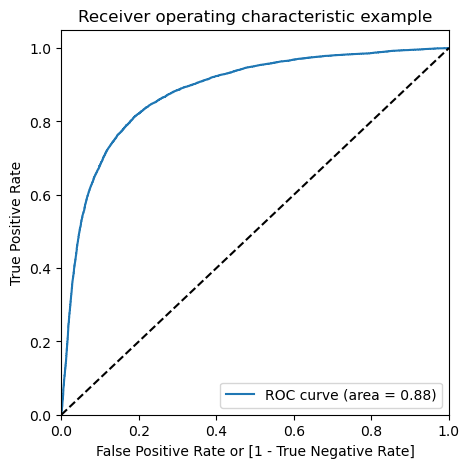

In [140]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

## Optimal cut off values

In [141]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.872760,1,1,1,1,1,1,1,1,1,1,0
1,0,0.690923,1,1,1,1,1,1,1,1,0,0,0
2,1,0.805292,1,1,1,1,1,1,1,1,1,1,0
3,0,0.044946,0,1,0,0,0,0,0,0,0,0,0
4,1,0.858342,1,1,1,1,1,1,1,1,1,1,0


In [142]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5, 0.5, 0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.501382  1.000000  0.000000
0.1   0.1  0.656472  0.976671  0.334499
0.2   0.2  0.718793  0.954572  0.481707
0.3   0.3  0.760429  0.924715  0.595233
0.4   0.4  0.790905  0.889882  0.691381
0.5   0.5  0.808612  0.841832  0.775207
0.6   0.6  0.808826  0.768420  0.849457
0.7   0.7  0.784091  0.658837  0.910040
0.8   0.8  0.711576  0.466103  0.958410
0.9   0.9  0.580469  0.177056  0.986119


### Plotting accuracy sensitivity and specificity for various probabilities.

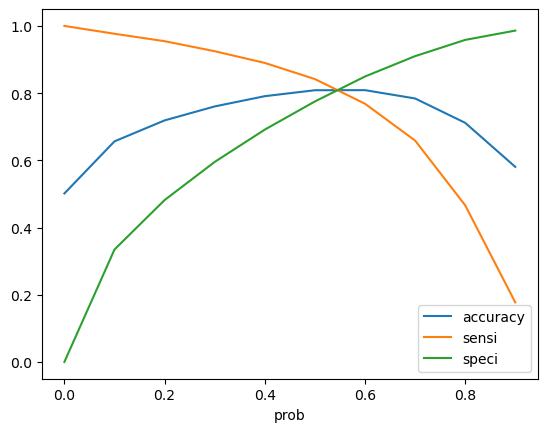

In [143]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- Closer to 0.6 looks like a better probability, than 0.5

### Probability of 0.6

In [144]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)

# Predict on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.6 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
29054,1,0.682463,1
8652,0,0.228042,0
34178,1,0.310600,0
12526,1,0.881458,1
27012,0,0.452087,0


In [145]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)}')

[[6850 1189]
 [1840 6096]]

Accuracy : 0.8103912363067293


### Probability of 0.5

In [146]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)

# Predict on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
29054,1,0.682463,1
8652,0,0.228042,0
34178,1,0.310600,0
12526,1,0.881458,1
27012,0,0.452087,0


In [147]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)}')

[[6257 1782]
 [1288 6648]]

Accuracy : 0.8078247261345853


### Accuracy levels are maintained in the test data as well. 

- Top 10 parameters

In [148]:
abs(res.params).sort_values(ascending=False)[0:11]

loc_ic_mou_8          2.479126
const                 1.569455
monthly_2g_8          0.760471
monthly_3g_8          0.755409
goodp_loc_ic_mou      0.696666
sachet_2g_8           0.599238
total_rech_num_8      0.572589
last_day_rch_amt_8    0.458966
goodp_tot_mou         0.420133
std_og_mou_8          0.405137
std_ic_t2t_mou_8      0.388171
dtype: float64

- With Logistic regression, at a probability of 0.5,  we are getting an accuracy of 80.8% on train data and 80.7% on test data
- At the probility of 0.6. the accuracy of the test data increases to 81.0%. However, since sensitivity is more critical than specificity, we will stick to 0.5.
- If we look at the top 10 parameters based on coefficients, most of these are for the month of August (Which is the Action phase). Hence it is clear that Action phase is critical in assessing if a customer is likely to churn. Also, this is the period where companies should be running schemes etc. 

# Decision Tree

In [150]:
X.shape

(28163, 55)

In [151]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_res)
X_pca.shape

(53250, 25)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, train_size=0.7, random_state=25)

In [153]:
from sklearn.tree import DecisionTreeClassifier

# Initial classifier
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(X_train, y_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = intial_dt.predict(X_test)

# Print the report on test data
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.8876995305164319
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      8039
           1       0.82      0.89      0.85      7936

    accuracy                           0.85     15975
   macro avg       0.85      0.85      0.85     15975
weighted avg       0.85      0.85      0.85     15975



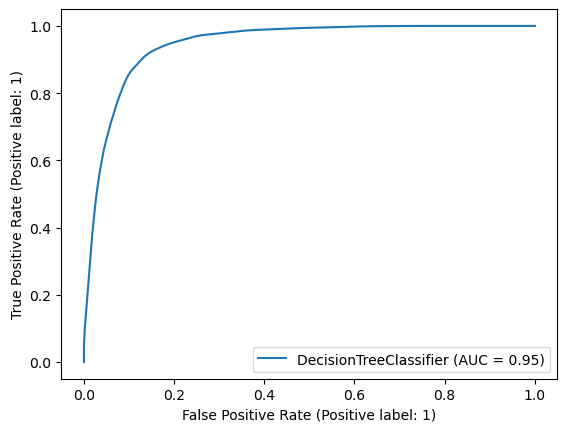

In [154]:
# Plot ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(intial_dt, X_train, y_train, drop_intermediate=False)
plt.show()

### Hyperparameter tuning

In [155]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Perform gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [156]:
grid_search.best_score_

0.8747686632223651

In [157]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, random_state=42)

In [158]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      8039
           1       0.86      0.92      0.89      7936

    accuracy                           0.89     15975
   macro avg       0.89      0.89      0.89     15975
weighted avg       0.89      0.89      0.89     15975



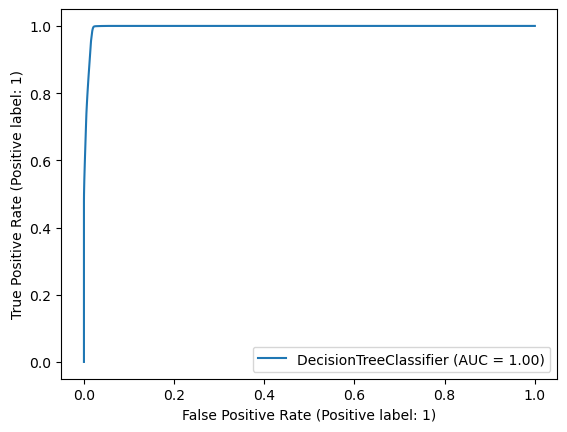

In [159]:
# ROC
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

### A very high accuracy in decision tree (89%)

## Random Forest

Train accuracy : 0.8876995305164319
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      8039
           1       0.88      0.89      0.88      7936

    accuracy                           0.88     15975
   macro avg       0.88      0.88      0.88     15975
weighted avg       0.88      0.88      0.88     15975



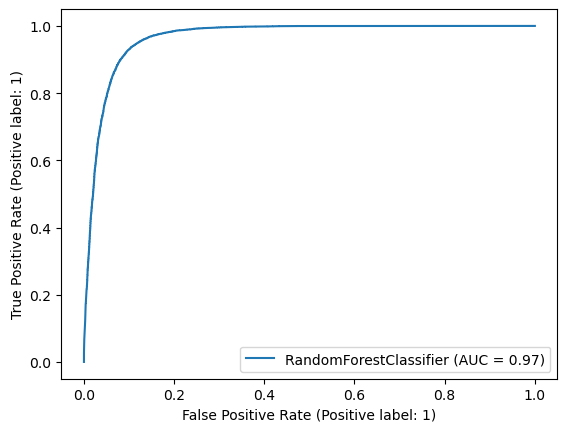

In [160]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

# Plotting ROC
plot_roc_curve(rf, X_train, y_train)
plt.show()

In [162]:
# Hyperparameter Tuning
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [163]:
grid_search.best_score_

0.9265192376085056

In [164]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [165]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      8039
           1       0.92      0.95      0.94      7936

    accuracy                           0.94     15975
   macro avg       0.94      0.94      0.94     15975
weighted avg       0.94      0.94      0.94     15975



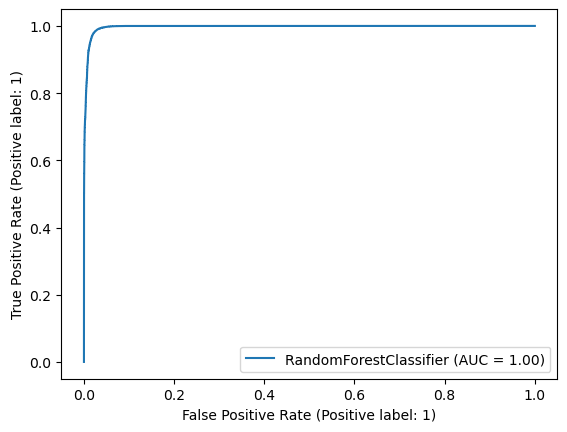

In [166]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

### An accuracy of 94% in the Random forest

In [167]:
final_model = RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [168]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)



# Print the report
print("Report on train data")
print(metrics.classification_report(y_train, y_train_pred))

print("Report on test data")
print(metrics.classification_report(y_test, y_test_pred))

Report on train data
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     18586
           1       0.97      0.99      0.98     18689

    accuracy                           0.98     37275
   macro avg       0.98      0.98      0.98     37275
weighted avg       0.98      0.98      0.98     37275

Report on test data
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      8039
           1       0.92      0.95      0.94      7936

    accuracy                           0.94     15975
   macro avg       0.94      0.94      0.94     15975
weighted avg       0.94      0.94      0.94     15975



- The advantage of Random forest over decision tree is that the recall scores are high and overall accuracy is also much higher. 
- We need models that will help us identify the churn almost to perfection, so that business loss is less.
- In Random forest, the recall in case of Churn customers is even higher in test data and train data, both.
- Since we are getting the highest accuracy in Random forest with higher recall in case of Churn. Then this is the model that we should consider